In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import random
import missingno as msno
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/dirve')

Mounted at /content/dirve


In [ ]:
# display all columns
pd.set_option('display.max_columns',None)
np.set_printoptions(threshold=np.inf)

In [ ]:
df=pd.read_csv("/content/dirve/MyDrive/Colab_Notebooks/P/Telecom Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

Overview of data

Detailed overview of dataset:


- Rows = 7043

- Columns= 21


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.


1.**customerID**: A unique ID that identifies each customer.


2.gender: The customer’s gender: Male, Female


3.SeniorCitizen: Indicates if the customer is 65 or older: Yes, No


4.Partner: Indicate if the customer has a partner: Yes, No


5.Dependents: Indicates if the customer lives with any dependents: Yes, No.
Dependents could be children, parents, grandparents, etc.


6.Tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


7.PhoneService: Indicates if the customer subscribes to home phone service with the company: Yes, No


8.MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No


9.InternetService: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.


10.OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No


11.OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No


12.DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No


13.TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No


14.StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.


15.StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.


16.Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.


17.PaperlessBilling: Indicates if the customer has chosen paperless billing: Yes, No


18.PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check


19.MonthlyCharge: Indicates the customer’s current total monthly charge for all their services from the company.


20.TotalCharges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.


21.Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

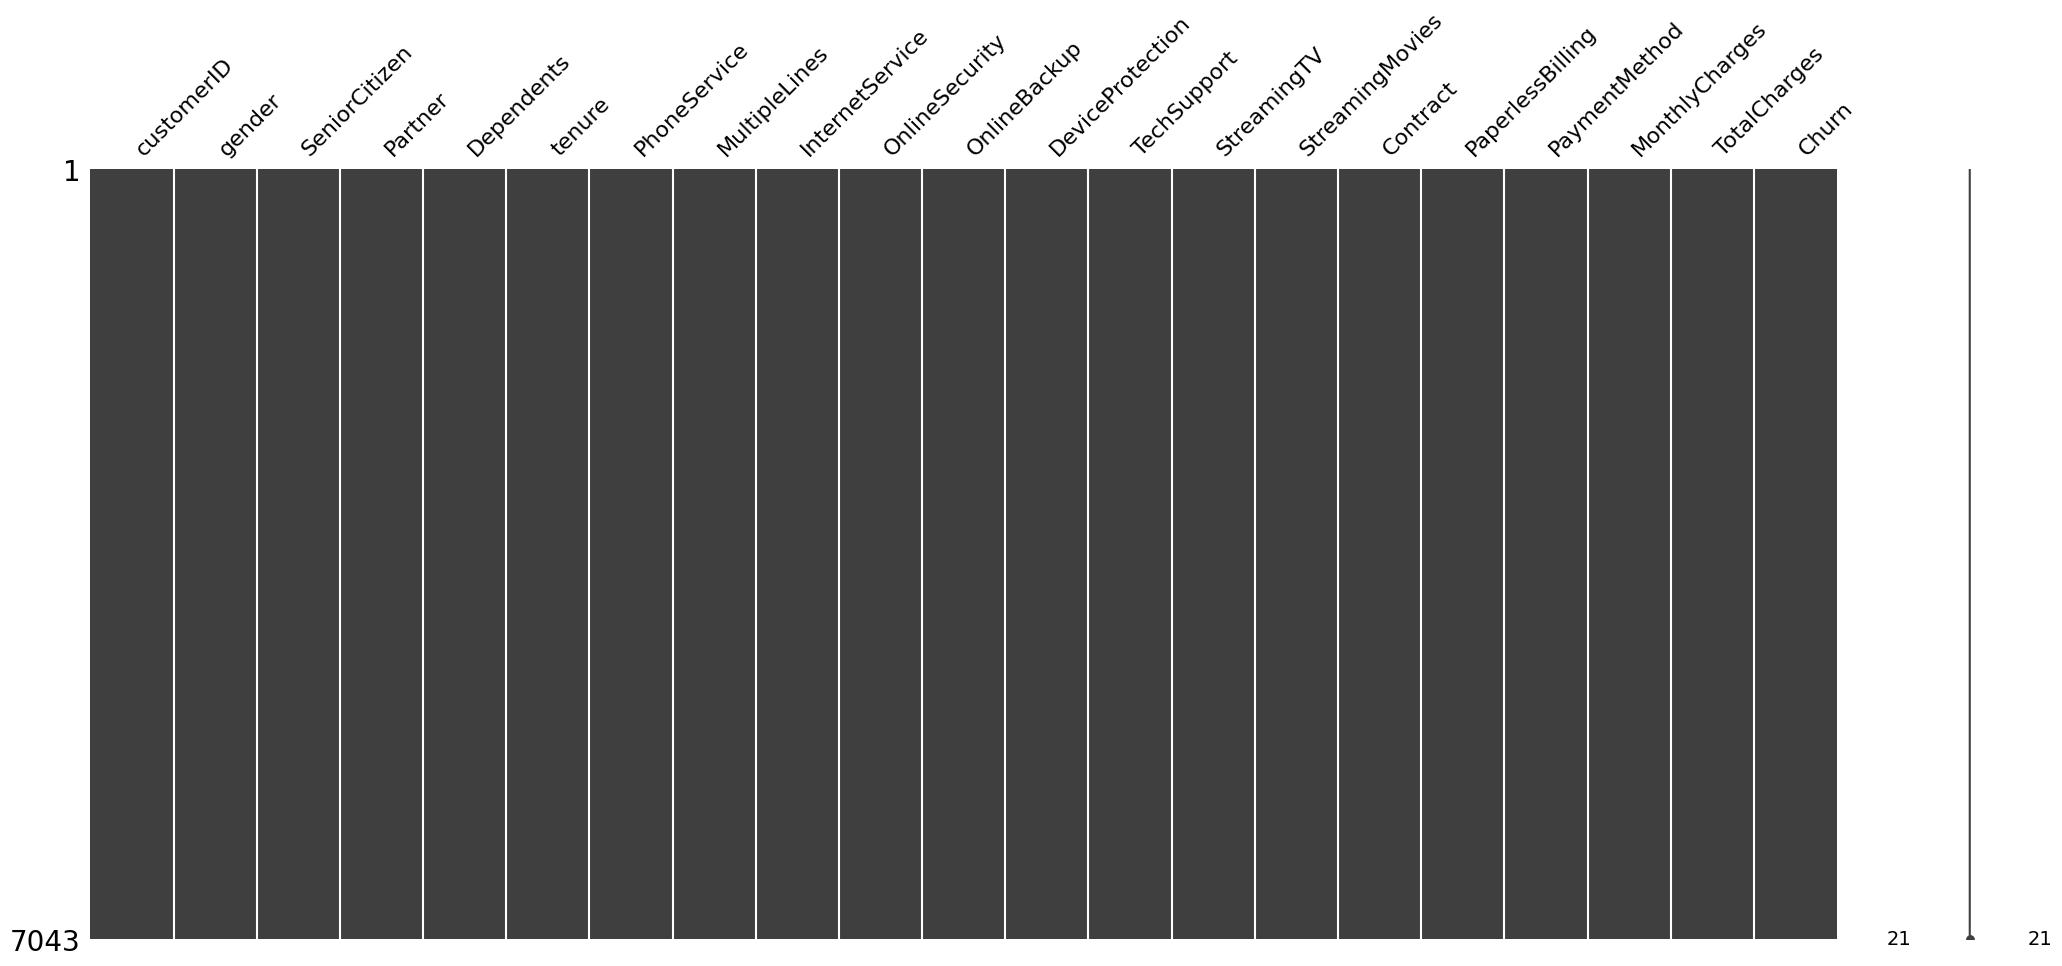

In [ ]:
msno.matrix(df)

<Axes: >

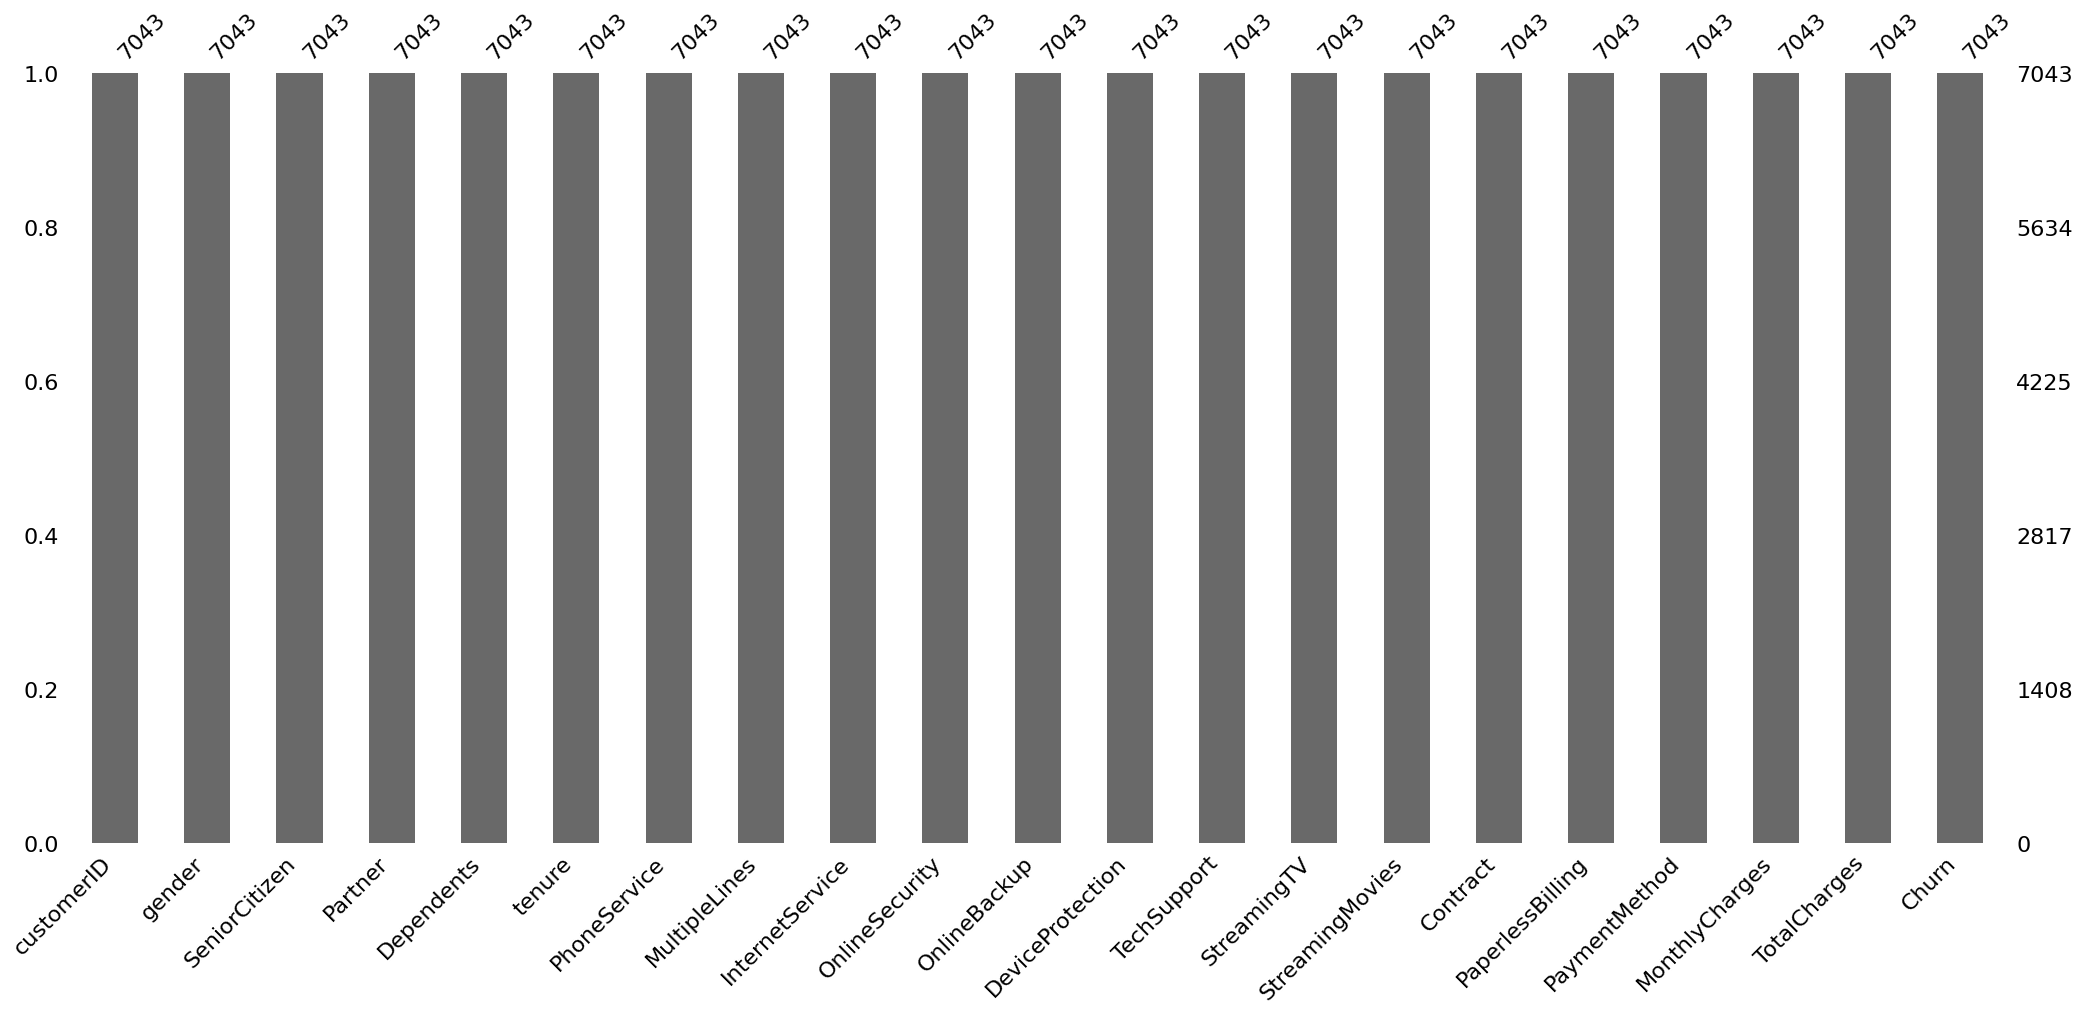

In [ ]:
msno.bar(df)

In [ ]:
# check missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# we don't need customer id so we will drop it
df.drop('customerID',axis=1,inplace=True)

In [ ]:
# TotalCharges data type here is object we will convert it to  float
# df['TotalCharges']=df['TotalCharges'].astype('float32') # this method will give error because there are missing as ' ' then we
#should convert ' ' to NaN then convert it
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [ ]:
df[df['TotalCharges'].isna()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

**Notice that all rows with NaN in Total Charges all has tenure value =0  
we check if there any tenure =0 or not**

In [ ]:
df[df['TotalCharges'].isna()].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

**No additional misssing values in tenure column (missing is only for NaN total Charges)  
so lets delete them since there are very small number only 11 row will not effect in our data**

In [ ]:
df.dropna(subset=['TotalCharges'],axis=0,inplace=True)

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df[df['tenure']==0].index

Index([], dtype='int64')

In [ ]:
# check duplications

df.duplicated().sum()

np.int64(22)

In [ ]:
df.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].map({1:'Yes',
                                            0:'No'})

In [ ]:
df.describe().T

count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [ ]:
df.describe(include=['object','bool']).T

count unique               top  freq
gender            7032      2              Male  3549
SeniorCitizen     7032      2                No  5890
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

In [ ]:
gender_count=df['gender'].value_counts()
gender_count

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [ ]:

churn_count=df['Churn'].value_counts()
churn_count

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [ ]:
fig=make_subplots(rows=1,
             cols=2,
             specs=[[{'type':'domain'},
                   {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_count.index,
                    values=gender_count.values,
                    name='Gender'),1,1)
fig.add_trace(go.Pie(labels=churn_count.index,
                    values=churn_count.values,
                    name='Churn'),1,2)
fig.update_traces(hole=0.5,
                 hoverinfo='label+percent+name',
                 textfont_size=17,
#                  texttemplate='%{label}<br><b>%{percent}</b>',
                 texttemplate='%{label}<br><b>%{percent}<b>')
fig.update_layout(title_text='<b>Gender and Churn Distributions',
                 annotations=[dict(text='<b>Gender',
                             x=0.17,
                             y=0.5,
                             font_size=25,
                             showarrow=False),
                             dict(text='<b>Churn',
                                 x=0.83,
                                 y=0.5,
                                 showarrow=False,
                                 font_size=25)])
fig.show()

**From Donut plot Male  & Female have approximatly equally percent(Male 50.5 % & Female 9.5 %)   
26.6 % of customers churn and swithced to another firm**

In [ ]:
gender_label=df.groupby(['Churn','gender']).size().reset_index().iloc[:,1].values.tolist()
gender_label

['Female', 'Male', 'Female', 'Male']

In [ ]:
gender_values=df.groupby(['Churn','gender']).size().reset_index().iloc[:,2].values.tolist()
gender_values

[2544, 2619, 939, 930]

In [ ]:
df.groupby(['Churn','gender']).size()

Churn  gender
No     Female    2544
       Male      2619
Yes    Female     939
       Male       930
dtype: int64

In [ ]:
churn_label=df.groupby(['Churn']).size().reset_index().iloc[:,0].values.tolist()
churn_label

['No', 'Yes']

In [ ]:
churn_values=df.groupby(['Churn']).size().reset_index().iloc[:,1].values.tolist()
churn_values

[5163, 1869]

In [ ]:
['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6'][::-1]

['#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0']

In [ ]:
churn_colors = ['#66b3ff', '#ff6666']
gender_colors = ['#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0']

In [ ]:
churn_explode = (0.3,0.3)
gender_explode = (0.1,0.1,0.1,0.1)

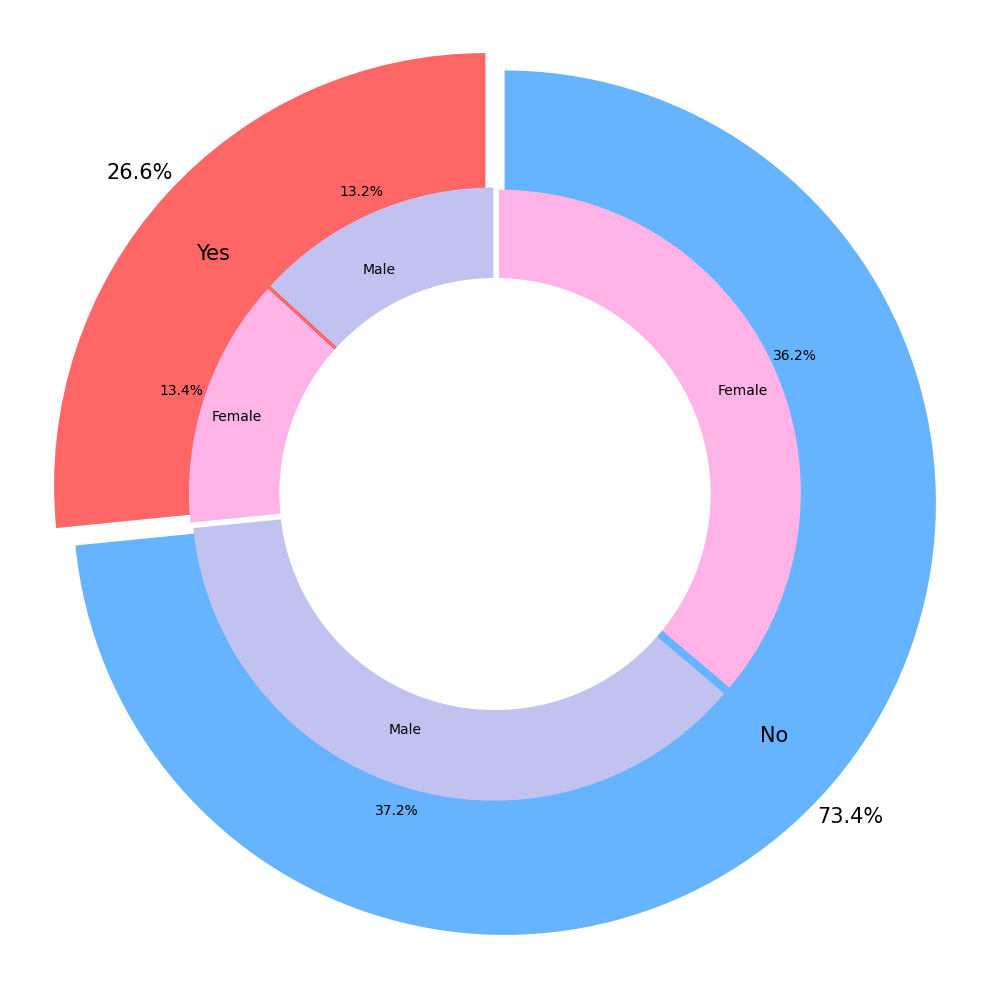

In [ ]:
plt.figure(figsize=(10,10))
text_props={'fontsize':15}
plt.pie(churn_values,
       labels=churn_label,
       autopct='%1.1f%%',
       pctdistance=1.08,
       labeldistance=0.8,
       colors=churn_colors,
       startangle=90,
       radius=10,
       explode=churn_explode,
        textprops=text_props,
       counterclock=False)



plt.pie(gender_values,
       labels=gender_label,
       autopct='%1.1f%%',
       pctdistance=1.08,
       labeldistance=0.8,
       colors=gender_colors,
       startangle=90,
       radius=7,
       explode=gender_explode,
#         textprops=text_props,
       counterclock=False)
centre_circle=plt.Circle((0,0),
                        radius=5,
                        fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.show()

**there is very small difference in customer percent who changed survice provider  
both genders behave in similar fashion**

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn_contract_count=df.groupby(['Churn','Contract']).size().reset_index().rename(columns={0:'count'})
churn_contract_count

Churn        Contract  count
0    No  Month-to-month   2220
1    No        One year   1306
2    No        Two year   1637
3   Yes  Month-to-month   1655
4   Yes        One year    166
5   Yes        Two year     48

In [ ]:
import pandas as pd

s = pd.Series({
    ("No", "Month-to-month"): 2220,
    ("No", "One year"): 1306,
    ("No", "Two year"): 1637,
    ("Yes", "Month-to-month"): 1655,
    ("Yes", "One year"): 166,
    ("Yes", "Two year"): 48,
})

s.index = pd.MultiIndex.from_tuples(s.index, names=["Churn", "Contract"])
d = s.reset_index()
d.columns = ["Churn", "Contract", "Count"]
d

Churn        Contract  Count
0    No  Month-to-month   2220
1    No        One year   1306
2    No        Two year   1637
3   Yes  Month-to-month   1655
4   Yes        One year    166
5   Yes        Two year     48

In [ ]:
import plotly.express as px

fig = px.bar(
    churn_contract_count,
    x="Churn",
    y="count",
    color="Contract",
    barmode="group",
    title="Churn by Contract Type (Grouped)"
)
fig.show()


In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='Contract',
            barmode='group')
fig.update_layout(title='<b>Distribution of Churn')
fig.show()

**Most customers's contract that churn was month to month with count = 1655  
then one year with count = 166  
then two year with count = 48**


In [ ]:
payment_method_count=df['PaymentMethod'].value_counts()
payment_method_count

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [ ]:
go.Figure(go.Pie(values=payment_method_count.values,
                labels=payment_method_count.index,
                hole=0.5))

In [ ]:
fig=px.pie(values=payment_method_count.values,
      names=payment_method_count.index,
      hole=0.5,
)
fig.update_layout(title='<b>Distribution of Payment Method')

In [ ]:
fig=px.histogram(df,
             x='Churn',
            color='PaymentMethod',
            barmode='group')
fig.update_layout(title='<b>distribution of Payment Method w.r.t Churn',
                 height=500,
                 width=1000)


**Major of customers that churn have Elctronic check Payment
but customers that choose  Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as payment method   
were less probability to churn**

In [ ]:
fig=px.histogram(df,
                x='Churn',
                color='InternetService',
                barmode='group',
                facet_col='gender')
fig.show()

**A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.  
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.**

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='Dependents',
            barmode='group')
fig.update_layout(title='<b>Distribution of Dependents w.r.t Churn',
                  width=1000,
                  height=500)

**Customers without dependents are more likely to churn**

In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='Partner',
            barmode='group')
fig.update_layout(title='<b>Distribution of Partner w.r.t Churn',
                  width=1000,
                  height=500)

**Customers with partner are more likely to churn**

In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='SeniorCitizen',
            barmode='group')
fig.update_layout(title='<b>Distribution of SeniorCitizen w.r.t Churn',
                  width=1000,
                  height=500)

**Most of senior citizen churn**

In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='OnlineSecurity',
            barmode='group')
fig.update_layout(title='<b>Distribution of OnlineSecurity w.r.t Churn',
                  width=1000,
                  height=500)

**major of customers that churn weren't have online security**

In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='PaperlessBilling',
            barmode='group')
fig.update_layout(title='<b>Distribution of PaperlessBilling w.r.t Churn',
                  width=1000,
                  height=500)

**Most of custers that churn prefer PaperlessBilling**

In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='TechSupport',
            barmode='group')
fig.update_layout(title='<b>Distribution of TechSupport w.r.t Churn',
                  width=1000,
                  height=500)

**customers with no Tech Support are most likely to churn**

In [ ]:
fig=px.histogram(df,
            x='Churn',
            color='PhoneService',
            barmode='group')
fig.update_layout(title='<b>Distribution of PhoneService w.r.t Churn',
                  width=1000,
                  height=500)

**major of customers that churn were have phone service**

In [ ]:
df.MonthlyCharges[(df['Churn']=='Yes')]

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

In [ ]:
df[df['Churn']=="Yes"]['MonthlyCharges']

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

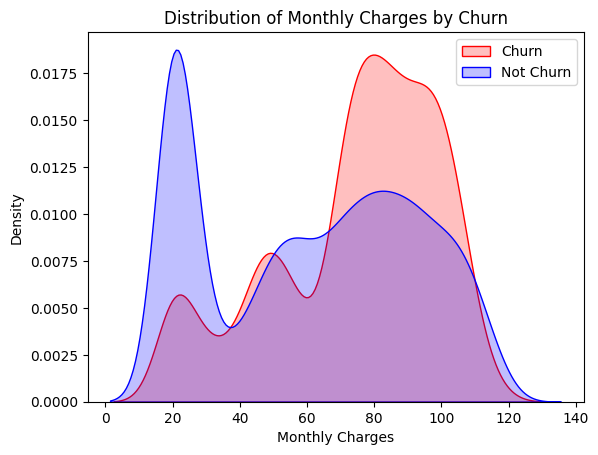

In [ ]:
ax=sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'],
               color='red',
               shade=True)
ax=sns.kdeplot(df[df['Churn']=='No']['MonthlyCharges'],
               color='blue',
               shade=True,
               ax=ax)
ax.legend(['Churn','Not Churn'])
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')
ax.set_title('Distribution of Monthly Charges by Churn')
plt.show()

**Customers with higher monthly charges are more likely to churn**

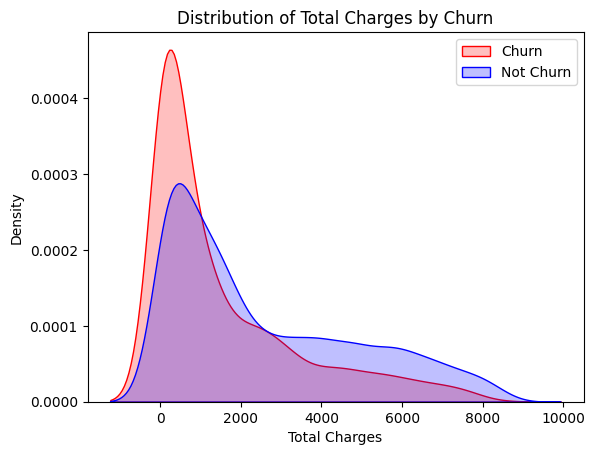

In [ ]:
ax=sns.kdeplot(df[df['Churn']=='Yes']['TotalCharges'],
               color='red',
               shade=True)
ax=sns.kdeplot(df[df['Churn']=='No']['TotalCharges'],
               color='blue',
               shade=True,
               ax=ax)
ax.legend(['Churn','Not Churn'])
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.set_title('Distribution of Total Charges by Churn')
plt.show()

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
fig=px.box(x=df['Churn'],
           y=df['tenure']
           )
fig.update_yaxes(title_text='Monthly Charges',
                 title_font=dict(size=20,family="Courier"))
fig.update_xaxes(title_text='Churn',
                 title_font=dict(size=20,family="Courier"))
fig.update_layout(title='<b>Churn & Tenure',
                  title_font=dict(size=30,family='Courier'),
                  height=500,
                  width=700,
                  autosize=True)

fig.show()

**New customers ar more likely to churn because most of custers that churn have small tenure values**

In [ ]:
pd.factorize(df['gender'])

(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))

In [ ]:
df['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object

In [ ]:
df.select_dtypes('number')

tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
2          2           53.85        108.15
3         45           42.30       1840.75
4          2           70.70        151.65
...      ...             ...           ...
7038      24           84.80       1990.50
7039      72          103.20       7362.90
7040      11           29.60        346.45
7041       4           74.40        306.60
7042      66          105.65       6844.50

[7032 rows x 3 columns]

In [ ]:
pd.factorize(df['MonthlyCharges'])

(array([  0,   1,   2, ..., 204, 113, 709]),
 Index([ 29.85,  56.95,  53.85,   42.3,   70.7,  99.65,   89.1,  29.75,  104.8,
         56.15,
        ...
          67.7,  35.15,   61.1,  68.45,  43.05,   72.0, 108.35,   63.1,   44.2,
          78.7],
       dtype='float64', length=1584))

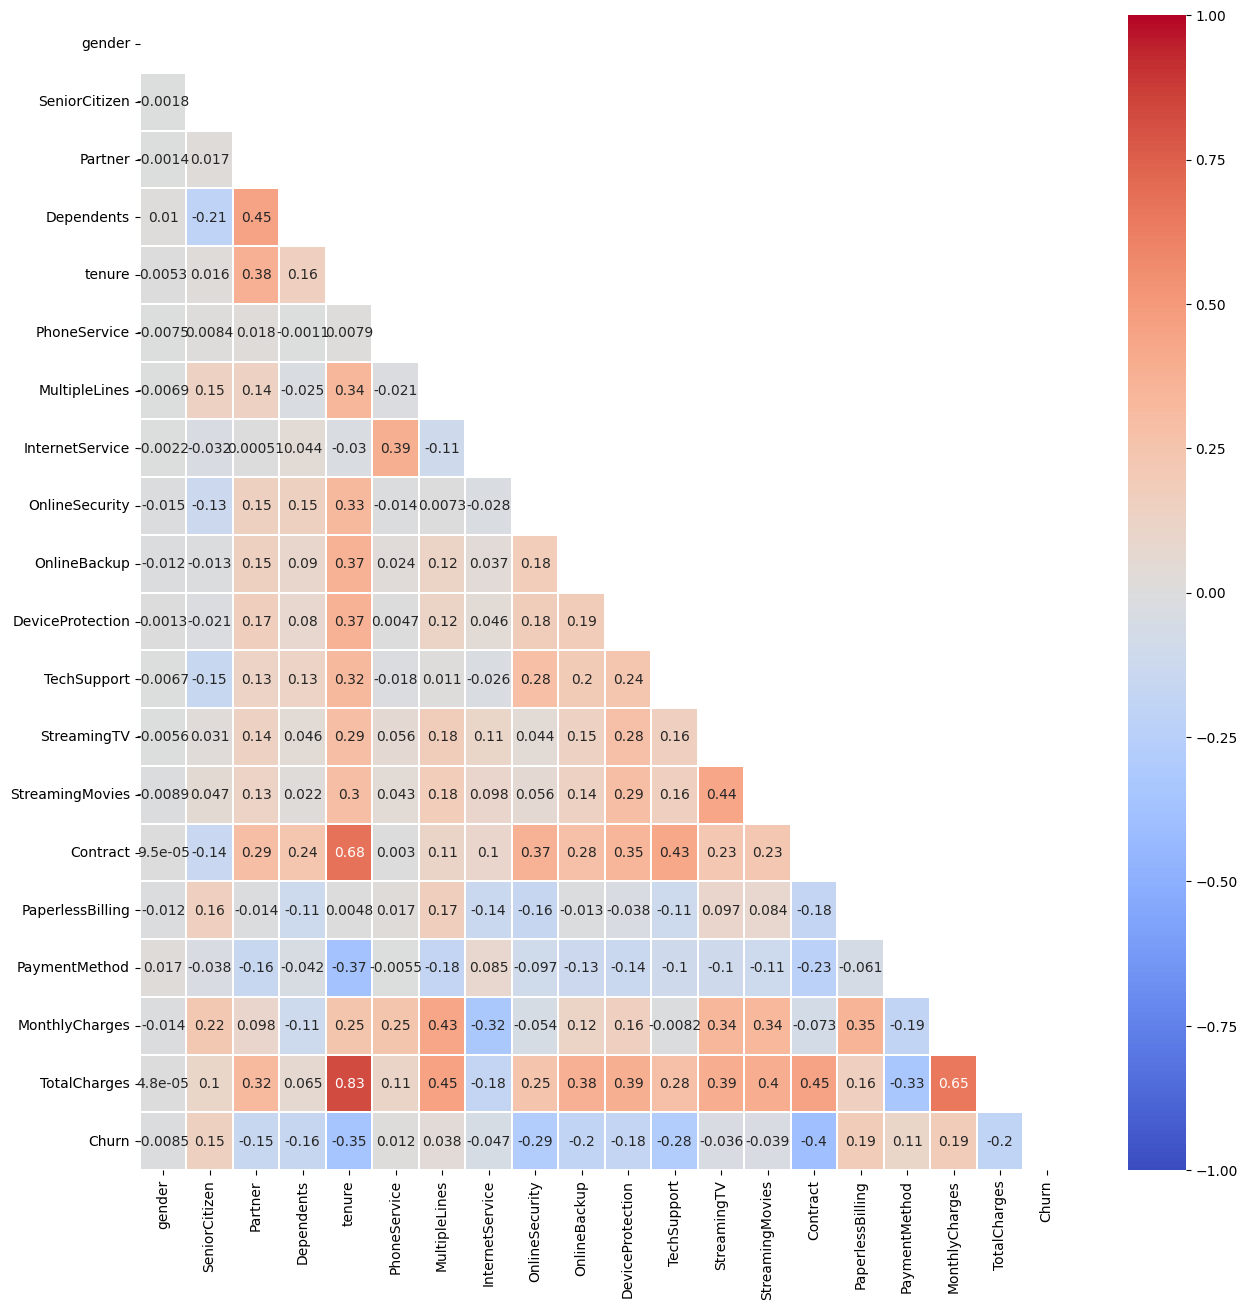

In [ ]:
plt.figure(figsize=(15,15))
label_encoder=LabelEncoder()
transformed_df=df.copy()
categorical_columns=df.select_dtypes('object').columns
for col in categorical_columns:
  transformed_df[col]=label_encoder.fit_transform(df[col])
corr=transformed_df.corr()
mask=np.triu(np.ones_like(corr,dtype='bool'))
fig=sns.heatmap(corr,
                mask=mask,
                linewidths=0.2,
                annot=True,
                cmap='coolwarm',
                vmin=-1,
                vmax=1,
                )

In [ ]:
transformed_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7032 rows x 20 columns]

In [ ]:
transformed_df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

In [ ]:
X=transformed_df.drop(['Churn'],axis=1)
y=transformed_df['Churn'].values

In [ ]:
X

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              2           29.85         29.85  
1                    0              3           56.95       1889.50  
2                    1              3           53.85        108.15  
3                    0              0           42.30       1840.75  
4                    1              2           70.70        151.65  
...                ...            ...             ...           ...  
7038                 1              3           84.80       1990.50  
7039                 1              1          103.20       7362.90  
7040                 1              2           29.60        346.45  
7041                 1              3           74.40        306.60  
7042                 1              0          105.65       6844.50  

[7032 rows x 19 columns]

In [ ]:
transformed_df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=40,)

<Axes: xlabel='Churn'>

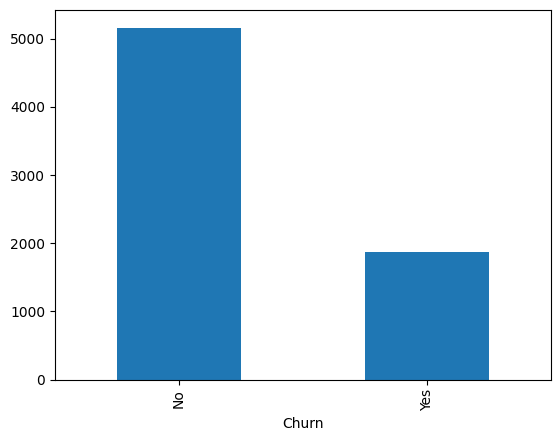

In [ ]:
df['Churn'].value_counts().plot(kind='bar')

In [ ]:
def creaet_distplot(df,feature,color='r'):
  plt.figure(figsize=(15,10))
  ax=sns.distplot(df[feature],color=color)
  plt.title(f'Distribution for {feature}')

In [ ]:
numeric_feature=df.select_dtypes('number').columns


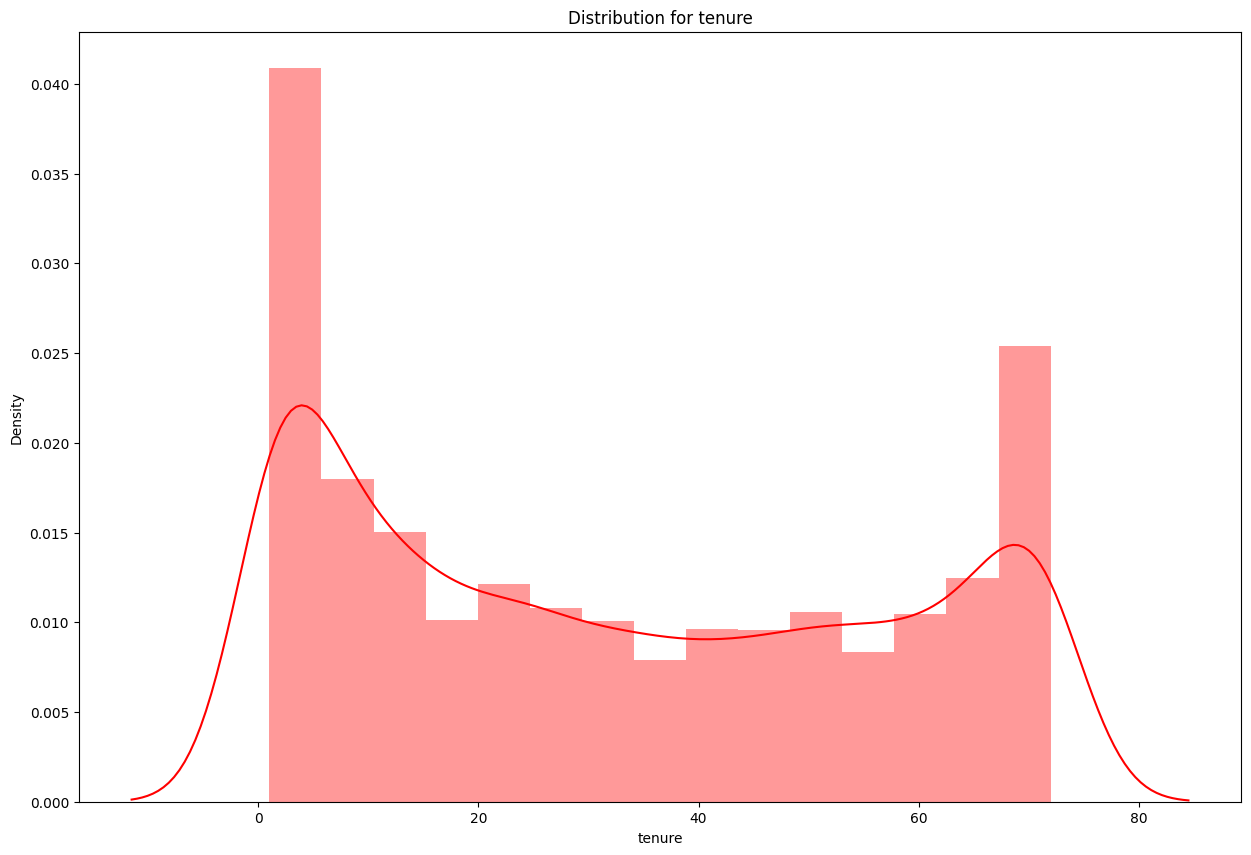

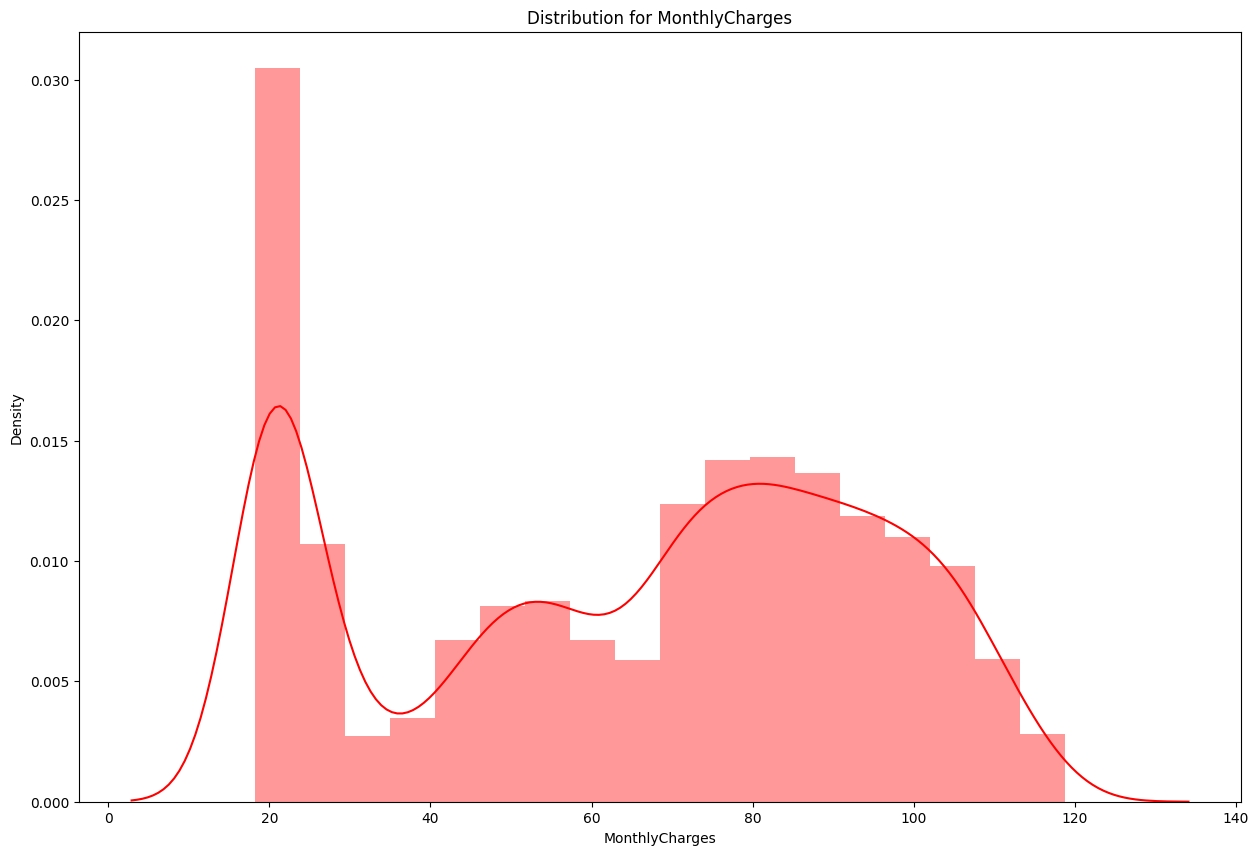

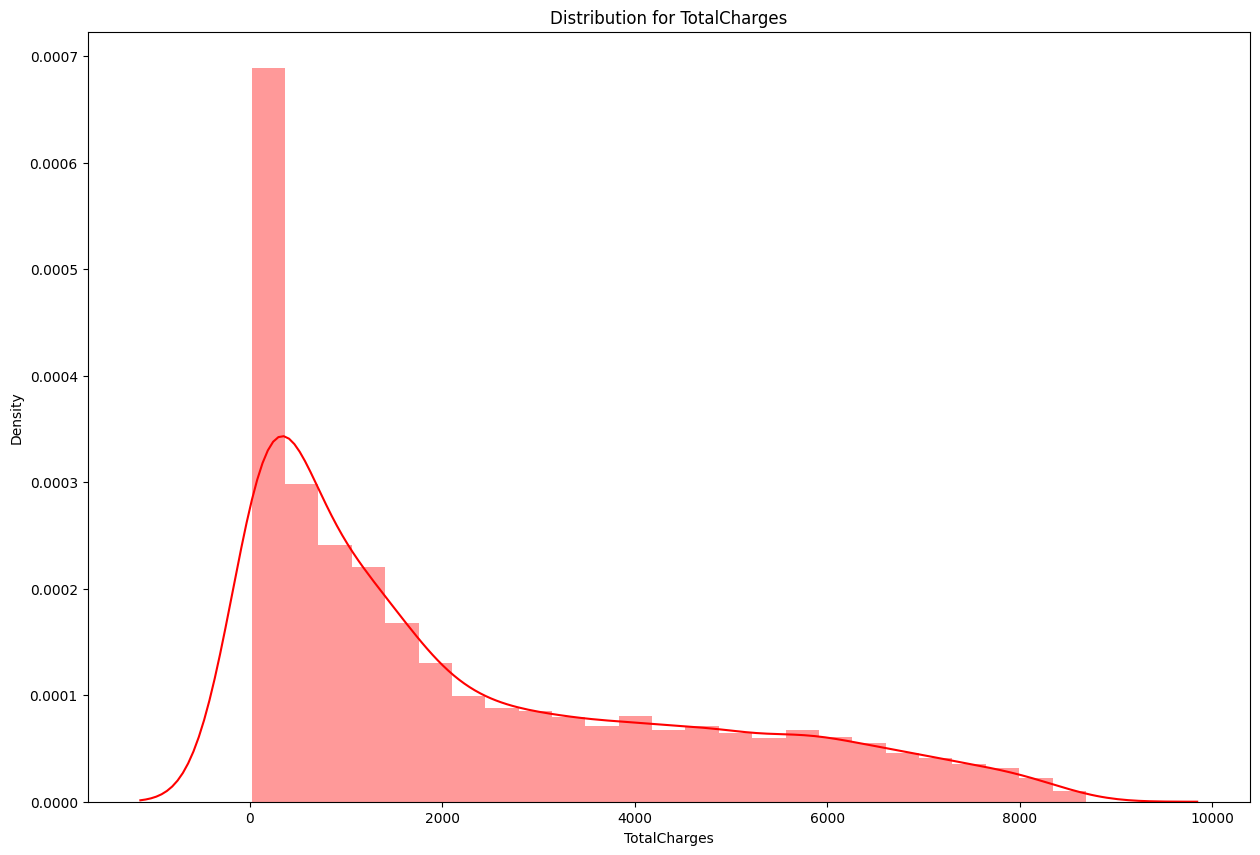

In [ ]:
for col in numeric_feature:
  creaet_distplot(df,col)

**Numeric Feature are distributed over different ranges so i will scale data using standard scaler**

In [ ]:
scaler=StandardScaler()
std_df=pd.DataFrame(scaler.fit_transform(df[numeric_feature]).astype('float64'),
columns=numeric_feature)

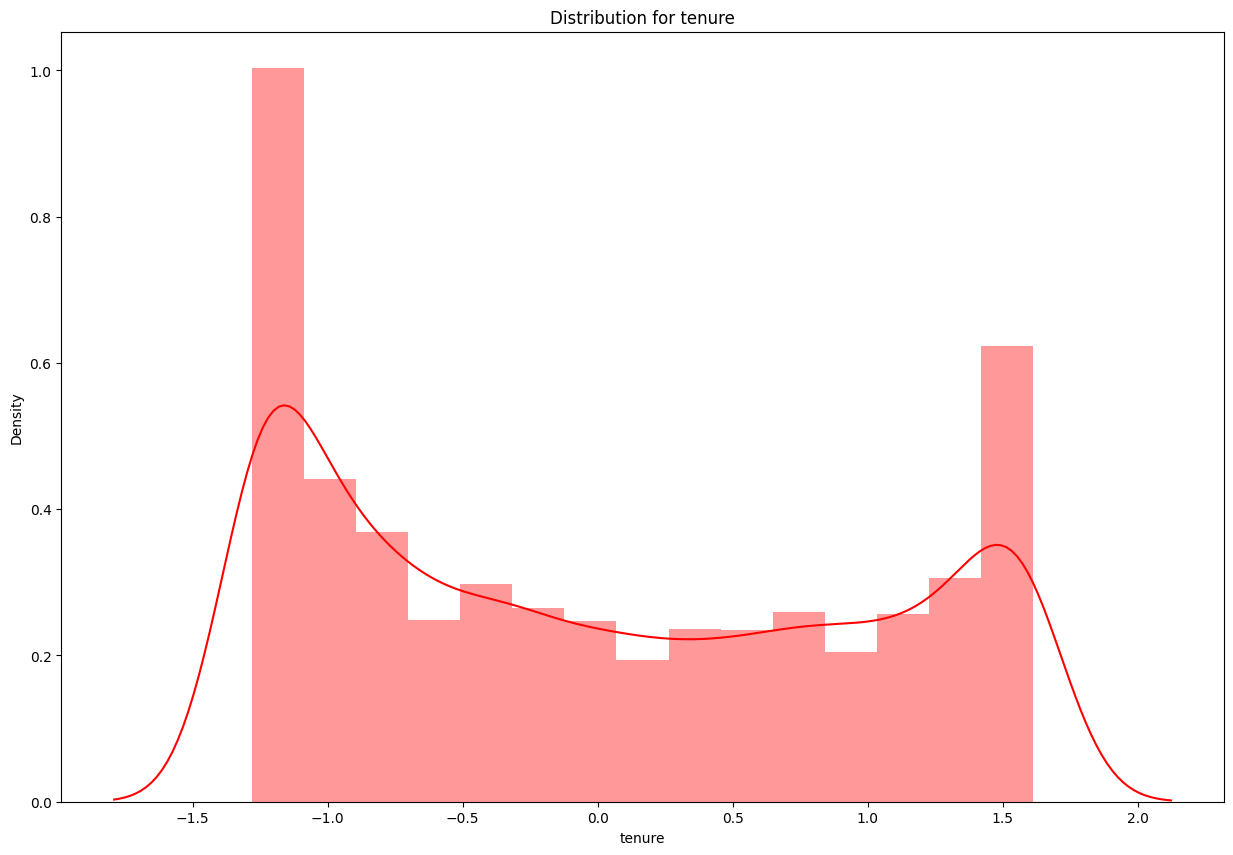

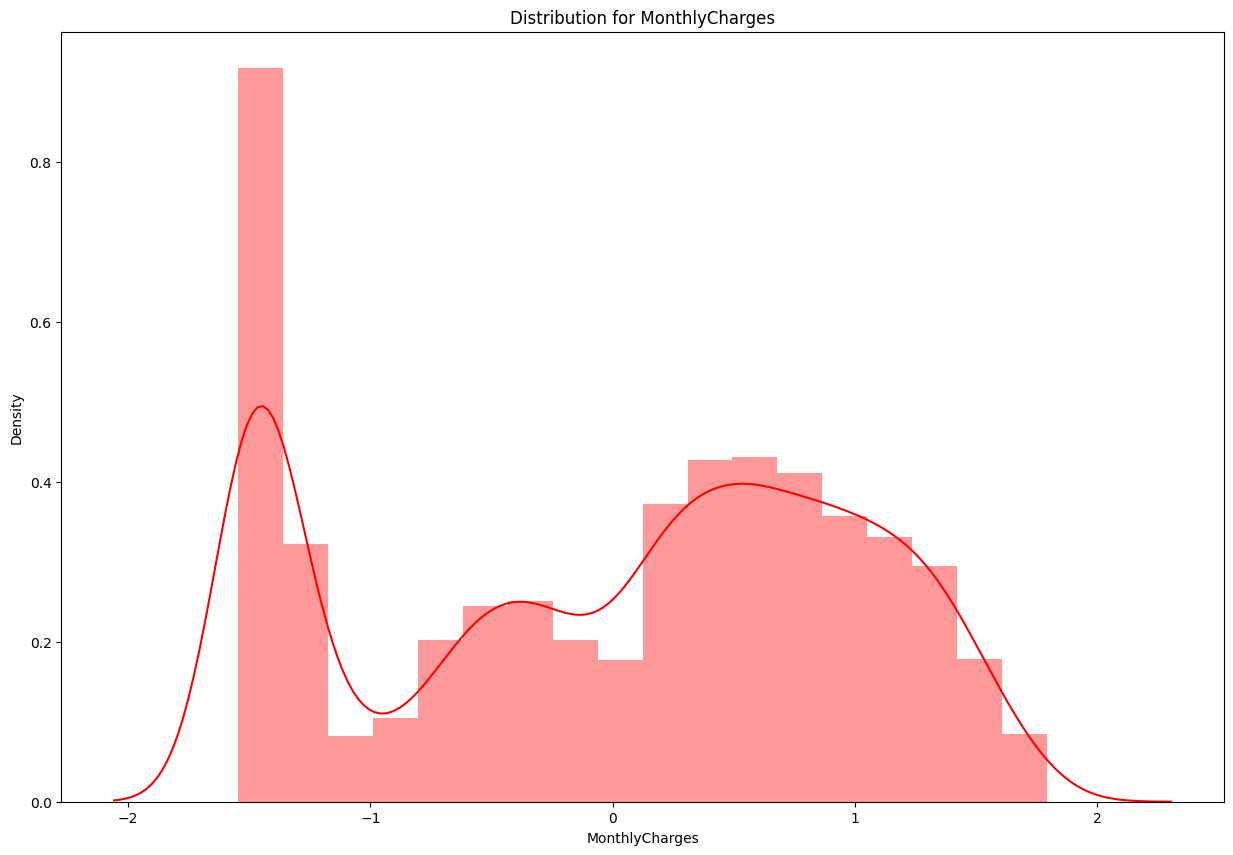

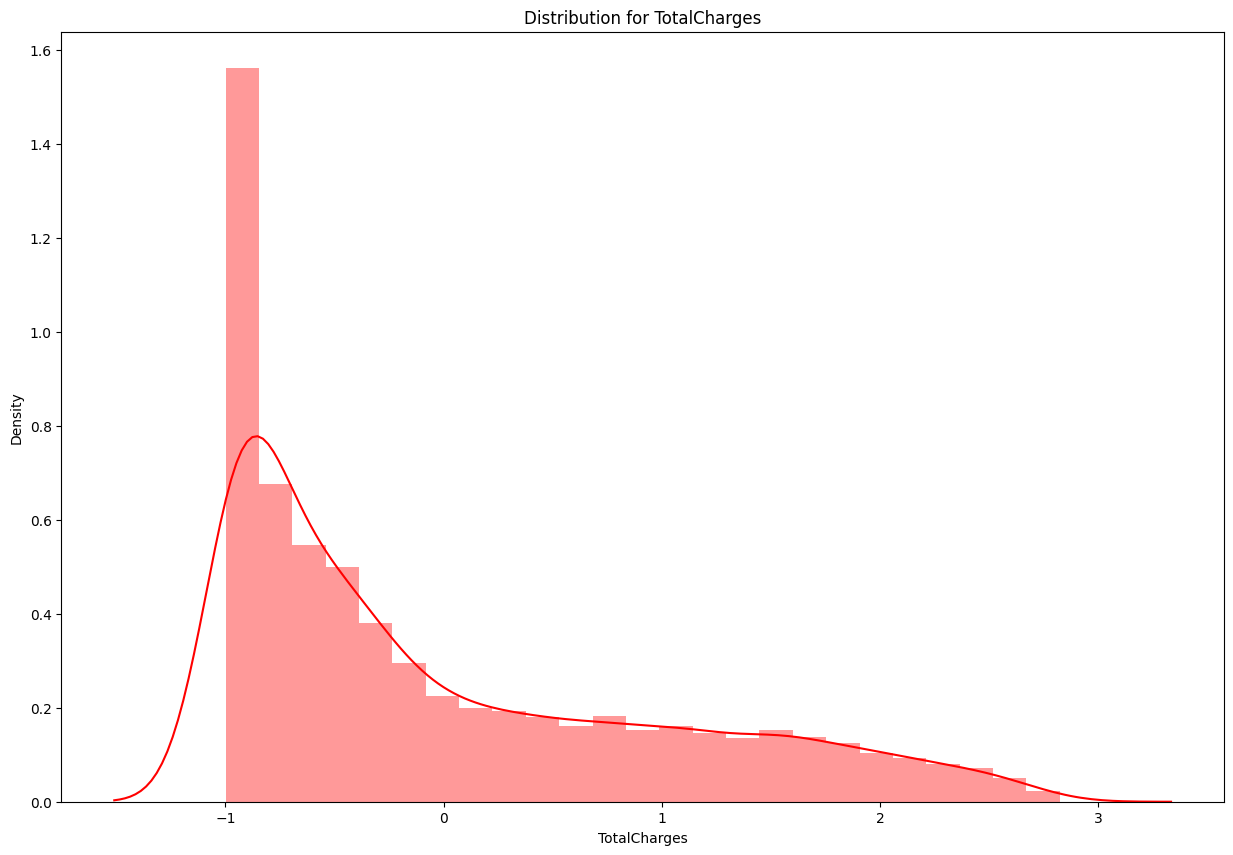

In [ ]:
for col in numeric_feature:
  creaet_distplot(std_df,col)

In [ ]:
df[['PaymentMethod', 'Contract', 'InternetService']]

PaymentMethod        Contract InternetService
0              Electronic check  Month-to-month             DSL
1                  Mailed check        One year             DSL
2                  Mailed check  Month-to-month             DSL
3     Bank transfer (automatic)        One year             DSL
4              Electronic check  Month-to-month     Fiber optic
...                         ...             ...             ...
7038               Mailed check        One year             DSL
7039    Credit card (automatic)        One year     Fiber optic
7040           Electronic check  Month-to-month             DSL
7041               Mailed check  Month-to-month     Fiber optic
7042  Bank transfer (automatic)        Two year     Fiber optic

[7032 rows x 3 columns]

In [ ]:
for col in ['PaymentMethod', 'Contract', 'InternetService']:
  print(f'# unique values in {col}',df[col].nunique())


# unique values in PaymentMethod 4
# unique values in Contract 3
# unique values in InternetService 3


In [ ]:
x_train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1107       0              0        1           0      69             1   
7005       1              0        1           0      23             1   
5198       0              1        1           0      47             1   
1407       1              0        0           1       8             0   
3622       0              0        1           1      72             1   
...      ...            ...      ...         ...     ...           ...   
768        1              0        0           0      41             1   
6532       0              1        0           0      18             1   
4045       0              0        0           0      14             1   
943        0              0        1           0      72             0   
256        0              0        1           1      61             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1107              2                2               1             1   
7005              0                2               1             1   
5198              2                1               2             0   
1407              1                0               2             0   
3622              2                0               2             2   
...             ...              ...             ...           ...   
768               0                1               0             0   
6532              0                2               1             1   
4045              0                1               0             0   
943               1                0               2             2   
256               2                1               2             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1107                 1            1            1                1         2   
7005                 1            1            1                1         1   
5198                 0            0            0                0         0   
1407                 0            2            0                2         2   
3622                 2            2            2                2         2   
...                ...          ...          ...              ...       ...   
768                  0            2            0                0         0   
6532                 1            1            1                1         1   
4045                 0            0            0                0         0   
943                  2            2            2                2         2   
256                  2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
1107                 0              0           24.25       1641.80  
7005                 0              1           19.30        486.20  
5198                 0              2           80.35       3825.85  
1407                 1              3           44.55        343.45  
3622                 0              1           90.95       6652.45  
...                ...            ...             ...           ...  
768                  1              2           74.25       3089.10  
6532                 0              0           20.35        369.60  
4045                 1              1           71.00        914.00  
943                  0              0           65.50       4919.70  
256                  0              1          115.10       7008.15  

[5625 rows x 19 columns]

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train[numeric_feature]=scaler.fit_transform(x_train[numeric_feature])
x_test[numeric_feature]=scaler.fit_transform(x_test[numeric_feature])

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
np.sqrt(7032)

np.float64(83.85702117294652)

In [ ]:
df.shape

(7032, 20)

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(x_train,y_train)
y_predict_knn=knn_clf.predict(x_test)
accuracy_score(y_test,y_predict_knn)

0.767590618336887

In [ ]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [ ]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [ ]:
knn_range=range(1,30)
knn_scores=[]
for i in knn_range:
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x_train,y_train,cv=5).mean()
  knn_scores.append(score)

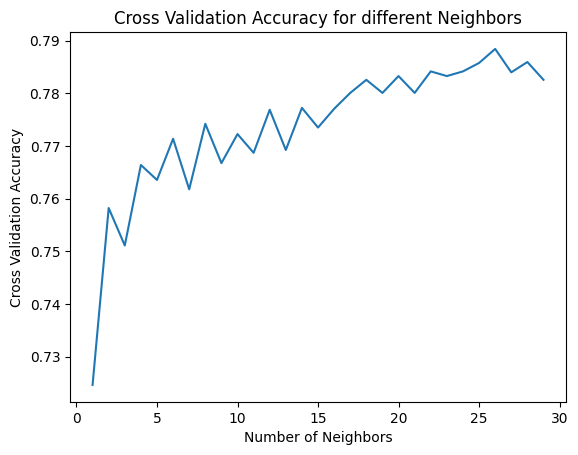

In [ ]:
plt.plot(knn_range,knn_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy for different Neighbors')
plt.show()

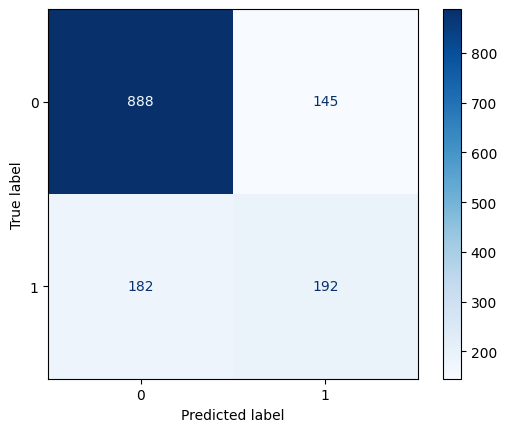

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_knn,cmap='Blues')

In [ ]:
param_grid={'n_neighbors':list(range(1,13)),
            'weights':['uniform','distance'],
            'metric':['euclidian','manhattan']}

In [ ]:
knn_grid_search=GridSearchCV(estimator=knn_clf,
                             param_grid=param_grid,
                             scoring='accuracy',
                             cv=5)
knn_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'metric': ['euclidian', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_grid_search.best_score_

np.float64(0.7825777777777778)

In [ ]:
knn_grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [ ]:
knn_grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

In [ ]:
best_knn=knn_grid_search.best_estimator_

In [ ]:
best_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [ ]:
y_predict_knn_best=best_knn.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict_knn_best))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
svm_param_gird={'C':[0.1,1],
                'gamma':['scale','auto',0.1],
                'kernel':['rbf']}

In [ ]:
svm_clf=SVC(kernel='rbf',
            gamma=10,
            C=0.001,
            random_state=73)

In [ ]:
import sys
sys.stdout.flush()


In [ ]:
svm_grid_search=GridSearchCV(estimator=svm_clf,
                             param_grid=svm_param_gird,
                             cv=5,
                             scoring='accuracy',
                             n_jobs=-1,
                             verbose=3)

In [ ]:
svm_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(C=0.001, gamma=10, random_state=73), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale', 'auto', 0.1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
svm_grid_search.best_score_

np.float64(0.7971555555555556)

In [ ]:
svm_grid_search.best_estimator_

SVC(C=1, gamma=0.1, random_state=73)

In [ ]:
svm_clf.fit(x_train,y_train)

SVC(C=0.001, gamma=10, random_state=73)

In [ ]:
svm_clf.score(x_train,y_train)

0.7342222222222222

In [ ]:
svm_clf.score(x_test,y_test)

0.7341862117981521

In [ ]:
decision_tree_clf=DecisionTreeClassifier(ccp_alpha=0.00001)
decision_tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=1e-05)

In [ ]:
decision_tree_clf.score(x_train,y_train)

0.9978666666666667

In [ ]:
decision_tree_clf.score(x_test,y_test)

0.7263681592039801

#Overfitting

In [ ]:
decision_tree_param_gird={'min_s'}

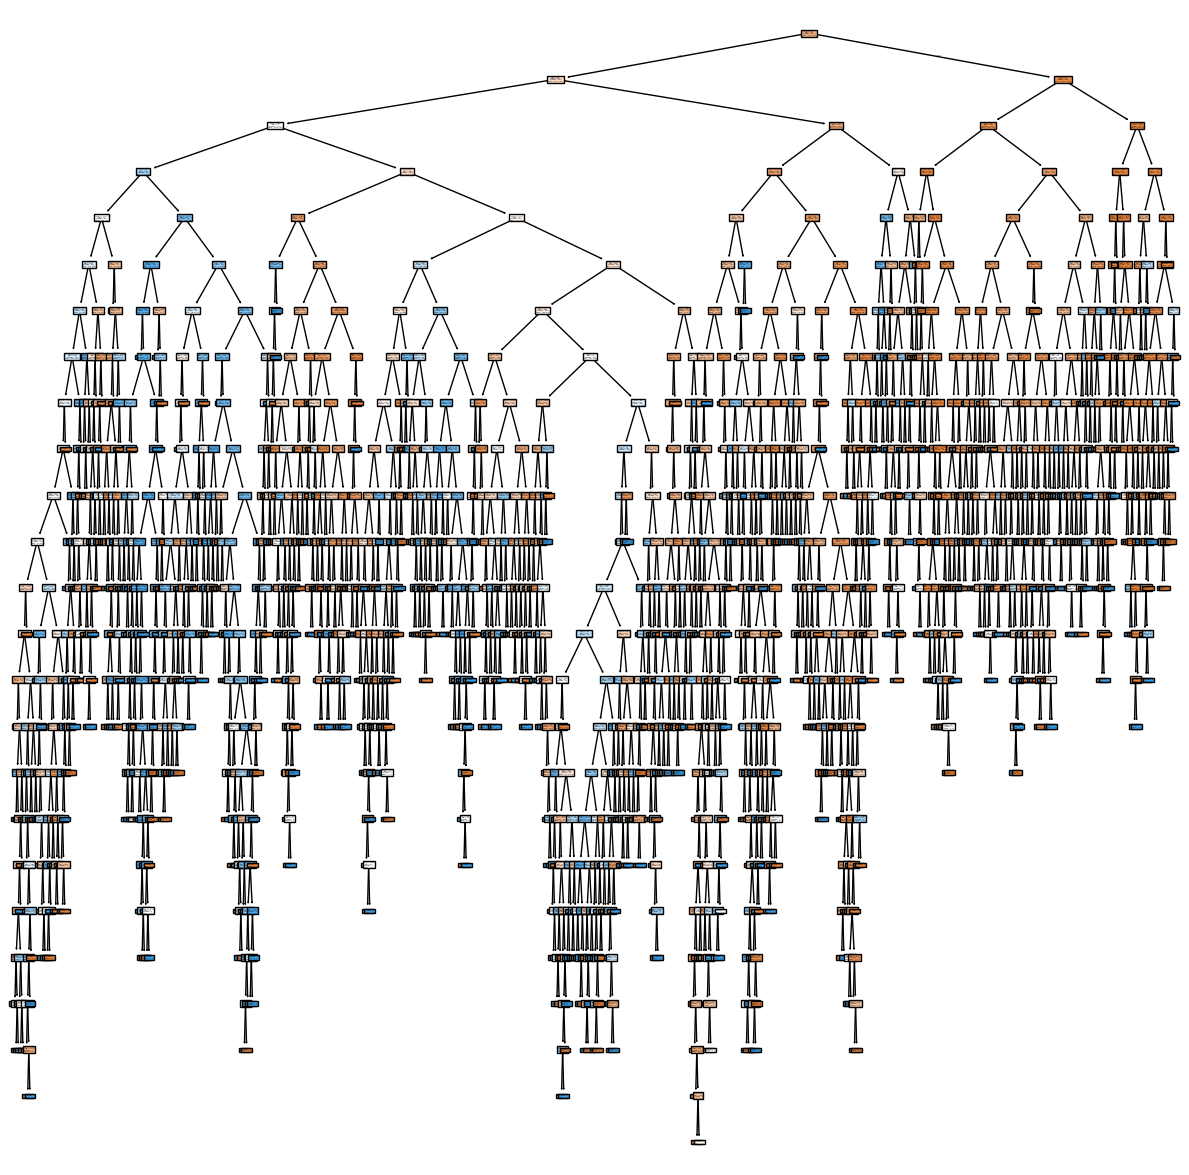

In [ ]:
plt.figure(figsize=(15, 15))
plot_tree(decision_tree_clf,filled=True,)
plt.show()

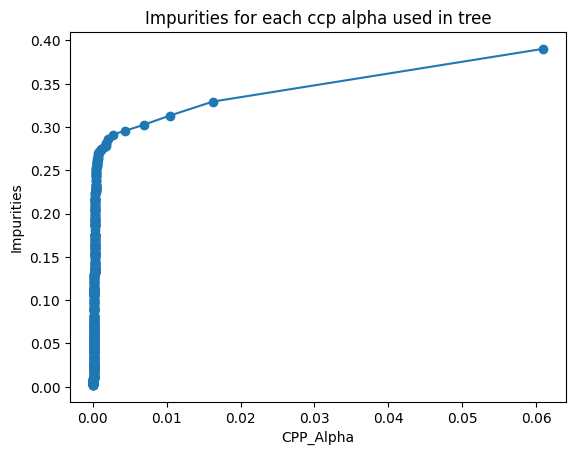

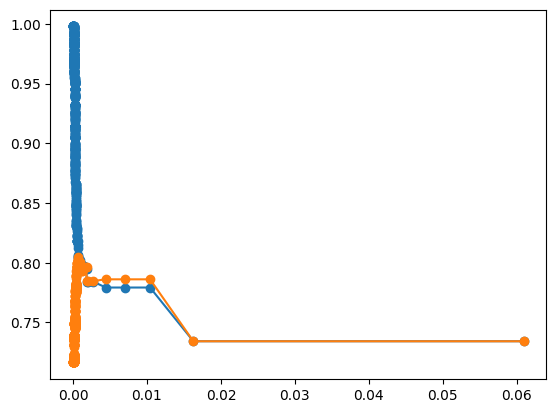

0.8045486851457001

In [ ]:
decision_tree_clf_try=DecisionTreeClassifier()
decision_tree_clf_try.fit(x_train,y_train)
path=decision_tree_clf_try.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
plt.plot(ccp_alphas,impurities,marker='o')
plt.xlabel('CPP_Alpha')
plt.ylabel('Impurities')
plt.title('Impurities for each ccp alpha used in tree')
plt.show()
train_scores=[]
test_scores=[]
for alpha in ccp_alphas:
  decision_tree_model=DecisionTreeClassifier(random_state=73,ccp_alpha=alpha)
  decision_tree_model.fit(x_train,y_train)
  train_scores.append(decision_tree_model.score(x_train,y_train))
  test_scores.append(decision_tree_model.score(x_test,y_test))
plt.plot(ccp_alphas,train_scores,marker='o',label='Train Accuracy')
plt.plot(ccp_alphas,test_scores,marker='o',label='Test Accuracy')
plt.show()
optimal_alpha=ccp_alphas[test_scores.index(max(test_scores))]
best_decision_tree_clf=DecisionTreeClassifier(random_state=73,ccp_alpha=optimal_alpha)
best_decision_tree_clf.fit(x_train,y_train)
best_decision_tree_clf.score(x_train,y_train)
best_decision_tree_clf.score(x_test,y_test)


In [ ]:
print(best_decision_tree_clf.score(x_train,y_train))
print(best_decision_tree_clf.score(x_test,y_test))

0.8126222222222222
0.8045486851457001


In [ ]:
plot_tree??

In [ ]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

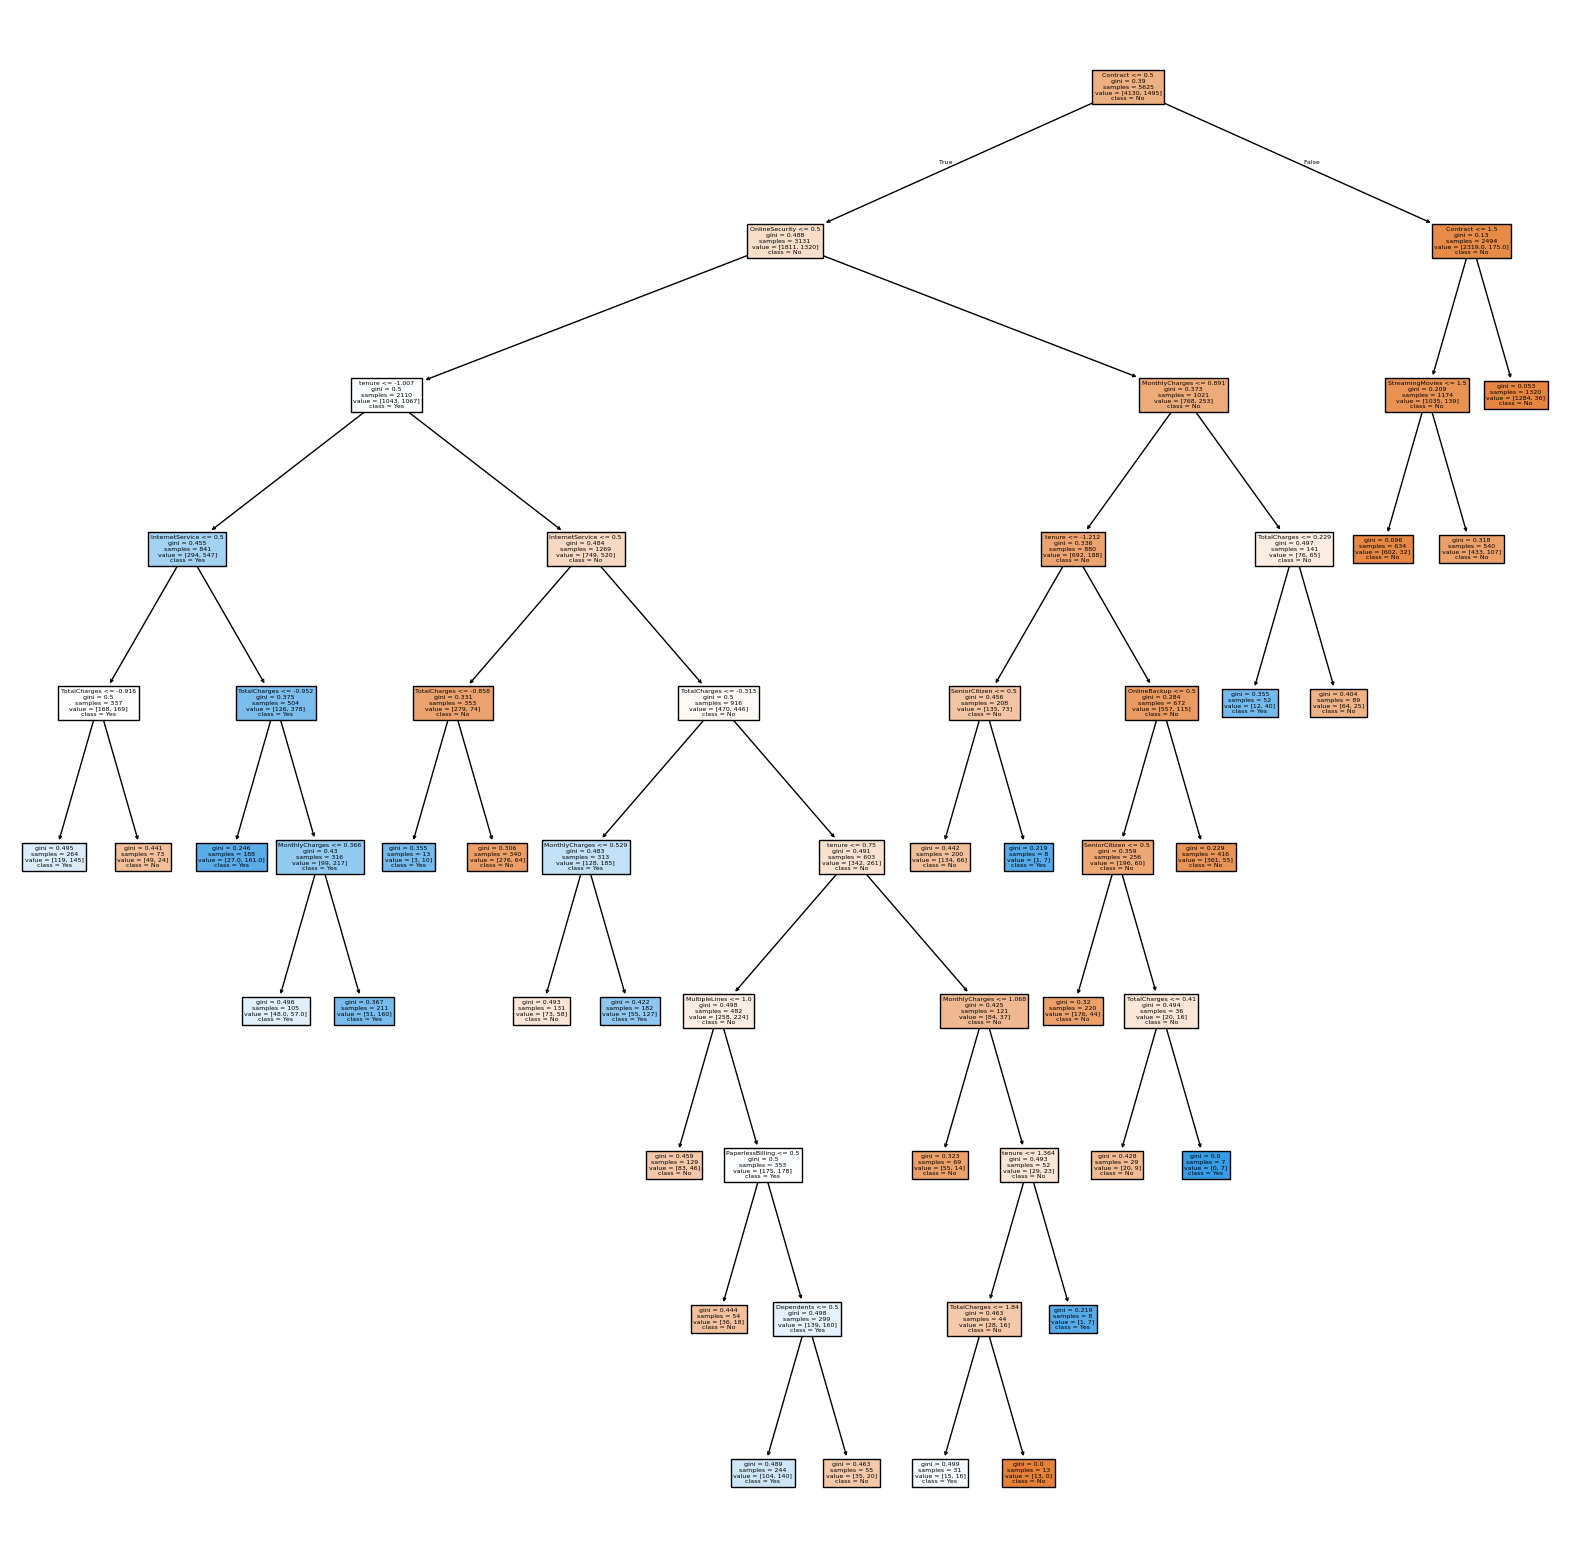

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(best_decision_tree_clf,filled=True,feature_names=X.columns,class_names=df['Churn'].unique())
plt.show()

In [ ]:
y_predict_decision_tree_best=best_decision_tree_clf.predict(x_test)

In [ ]:
np.concatenate((y_test.reshape(-1,1),y_predict_decision_tree_best.reshape(-1,1)),1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0]])

In [ ]:
print(classification_report(y_test,y_predict_decision_tree_best))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1033
           1       0.64      0.59      0.62       374

    accuracy                           0.80      1407
   macro avg       0.75      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407



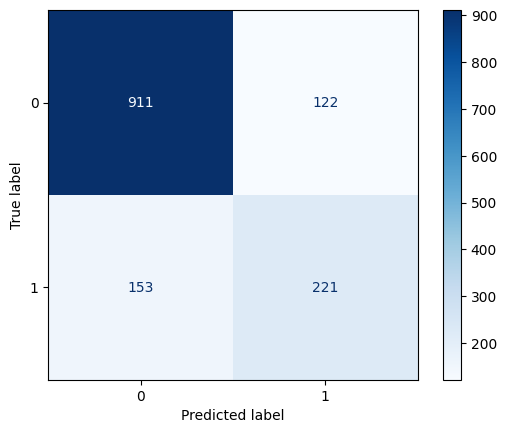

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_decision_tree_best,cmap='Blues')

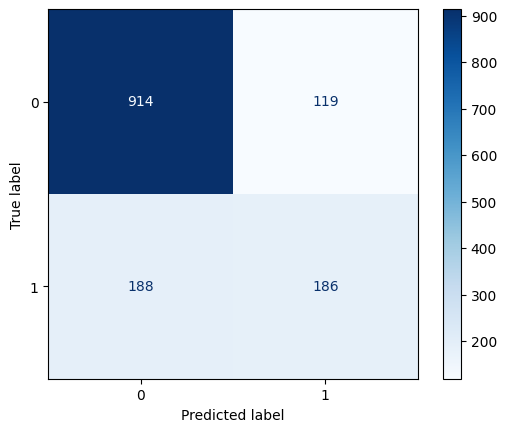

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_knn_best,cmap='Blues')

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Load dataset and split it
# # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a full decision tree (without pruning)
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(x_train, y_train)

# # Get the effective alphas and corresponding impurities
# path = dt_model.cost_complexity_pruning_path(x_train, y_train)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities

# # Plot the pruning path
# plt.figure(figsize=(8, 6))
# plt.plot(ccp_alphas, impurities, marker="o", label="impurity vs alpha")
# plt.xlabel("Effective alpha")
# plt.ylabel("Total impurity of leaves")
# plt.title("Cost Complexity Pruning Path")
# plt.show()

# # Now, train decision trees for each alpha value and evaluate the performance
# train_scores = []
# val_scores = []

# for ccp_alpha in ccp_alphas:
#     dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
#     dt_model.fit(x_train, y_train)

#     train_scores.append(dt_model.score(x_train, y_train))
#     val_scores.append(dt_model.score(x_test, y_test))

# # Plot training and validation scores
# plt.figure(figsize=(8, 6))
# plt.plot(ccp_alphas, train_scores, marker="o", label="train score")
# plt.plot(ccp_alphas, val_scores, marker="o", label="validation score")
# plt.xlabel("Effective alpha")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs alpha for training and validation sets")
# plt.legend()
# plt.show()

# # Choose the alpha with the best validation score
# optimal_alpha = ccp_alphas[val_scores.index(max(val_scores))]

# # Refit the model with the optimal alpha
# best_dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
# best_dt_model.fit(x_train, y_train)

# # Evaluate on the test set
# print(f"Test Accuracy: {best_dt_model.score(x_test, y_test)}")


In [ ]:
feature_importance_dt=best_decision_tree_clf.feature_importances_

In [ ]:
feature_importance_dt_df=pd.DataFrame({'Feature':X.columns,
              'Importance':feature_importance_dt}).sort_values(by='Importance',ascending=False)

In [ ]:
feature_importance_dt_df

Feature  Importance
14          Contract    0.494726
8     OnlineSecurity    0.128194
4             tenure    0.108247
7    InternetService    0.089817
18      TotalCharges    0.079859
17    MonthlyCharges    0.048589
13   StreamingMovies    0.017816
1      SeniorCitizen    0.011579
6      MultipleLines    0.005771
3         Dependents    0.005552
15  PaperlessBilling    0.005217
9       OnlineBackup    0.004634
0             gender    0.000000
2            Partner    0.000000
5       PhoneService    0.000000
10  DeviceProtection    0.000000
12       StreamingTV    0.000000
11       TechSupport    0.000000
16     PaymentMethod    0.000000

In [ ]:
random_forest_clf=RandomForestClassifier(oob_score=True,
                                         random_state=73)

In [ ]:
random_forest_clf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True, random_state=73)

In [ ]:
random_forest_clf.score(x_test,y_test)

0.8031272210376688

In [ ]:
random_forest_clf.score(x_train,y_train)

0.9978666666666667

In [ ]:
random_forest_clf.oob_score_

0.7902222222222223

In [ ]:
random_forest_param_grid={'n_estimators':[300,400,500],
                          'min_samples_split':[30,50],
                          'max_leaf_nodes':[30,50]}

In [ ]:
random_forest_grid_search=GridSearchCV(estimator=random_forest_clf,
             param_grid=random_forest_param_grid,
             cv=3,
             scoring='accuracy')

In [ ]:
random_forest_grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=73),
             param_grid={'max_leaf_nodes': [30, 50],
                         'min_samples_split': [30, 50],
                         'n_estimators': [300, 400, 500]},
             scoring='accuracy')

In [ ]:
random_forest_grid_search.best_score_

np.float64(0.8016)

In [ ]:
random_forest_grid_search.best_estimator_

RandomForestClassifier(max_leaf_nodes=50, min_samples_split=50,
                       n_estimators=500, oob_score=True, random_state=73)

In [ ]:
best_random_forest=random_forest_grid_search.best_estimator_

In [ ]:
best_random_forest.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=50, min_samples_split=50,
                       n_estimators=500, oob_score=True, random_state=73)

In [ ]:
best_random_forest.score(x_train,y_train)

0.8197333333333333

In [ ]:
best_random_forest.score(x_test,y_test)

0.8081023454157783

In [ ]:
best_random_forest.predict_proba(x_test)

array([[0.55158111, 0.44841889],
       [0.96962547, 0.03037453],
       [0.69982825, 0.30017175],
       [0.77045026, 0.22954974],
       [0.97006504, 0.02993496],
       [0.96688466, 0.03311534],
       [0.97166919, 0.02833081],
       [0.37237215, 0.62762785],
       [0.96686251, 0.03313749],
       [0.97145721, 0.02854279],
       [0.93114497, 0.06885503],
       [0.62277979, 0.37722021],
       [0.4657241 , 0.5342759 ],
       [0.97140419, 0.02859581],
       [0.51138628, 0.48861372],
       [0.966908  , 0.033092  ],
       [0.21662268, 0.78337732],
       [0.87647802, 0.12352198],
       [0.95396535, 0.04603465],
       [0.19795924, 0.80204076],
       [0.93505452, 0.06494548],
       [0.81742669, 0.18257331],
       [0.90984041, 0.09015959],
       [0.75827553, 0.24172447],
       [0.96969076, 0.03030924],
       [0.91614923, 0.08385077],
       [0.85766758, 0.14233242],
       [0.82591042, 0.17408958],
       [0.19914015, 0.80085985],
       [0.83970076, 0.16029924],
       [0.

In [ ]:
y_predicted_probability_random_forest=best_random_forest.predict_proba(x_test)[:,1]

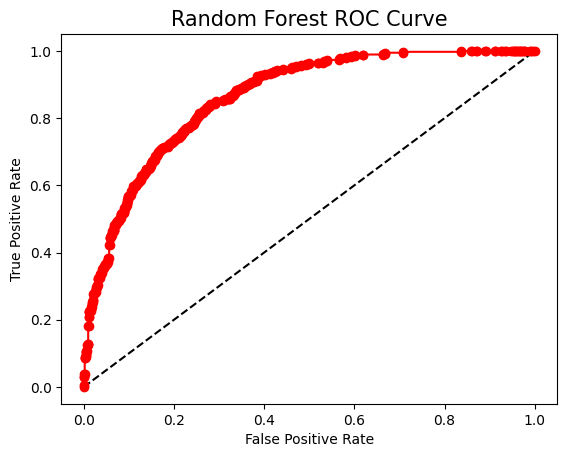

In [ ]:
fpr,tpr,thresholds =roc_curve(y_test,y_predicted_probability_random_forest)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest',color='red',marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=15)
plt.show()

In [ ]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [ ]:
logistic_regression.score(x_test,y_test)

0.8052594171997157

In [ ]:
logistic_regression.score(x_train,y_train)

0.8039111111111111

In [ ]:
y_predicted_probability_logistic_regression=logistic_regression.predict_proba(x_test)[:,1]

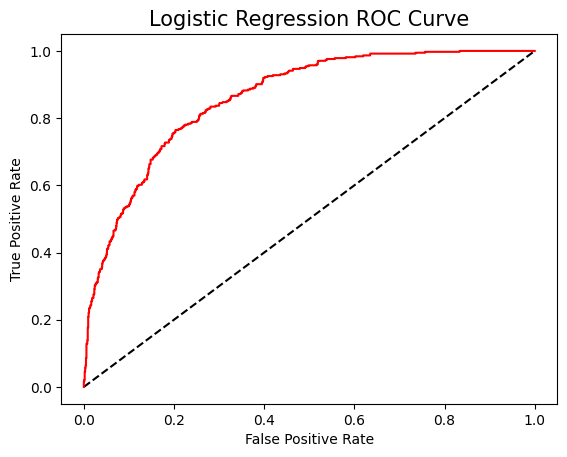

In [ ]:
fpr,tpr,thresholds =roc_curve(y_test,y_predicted_probability_logistic_regression)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=15)
plt.show()

In [ ]:
y_predict_logistic_reg=logistic_regression.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict_logistic_reg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



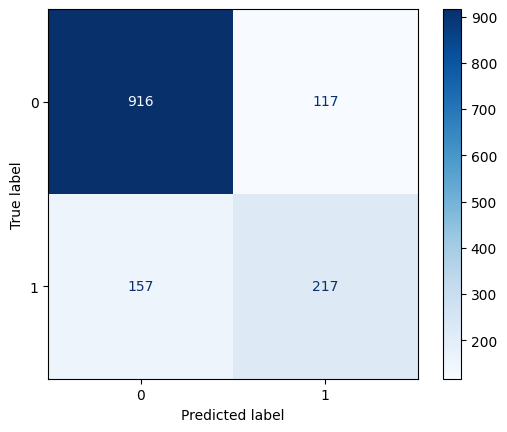

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_logistic_reg,cmap='Blues')

In [ ]:
adaboost_clf=AdaBoostClassifier()
adaboost_clf.fit(x_train,y_train)
y_predict_adaboost=adaboost_clf.predict(x_test)
np.concatenate((y_test.reshape(-1,1),y_predict_adaboost.reshape(-1,1)),1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0]])

In [ ]:
adaboost_clf.score(x_test,y_test)

0.8137882018479033

In [ ]:
adaboost_clf.score(x_train,y_train)

0.8014222222222223

In [ ]:
print(classification_report(y_test,y_predict_adaboost))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1033
           1       0.67      0.59      0.63       374

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407



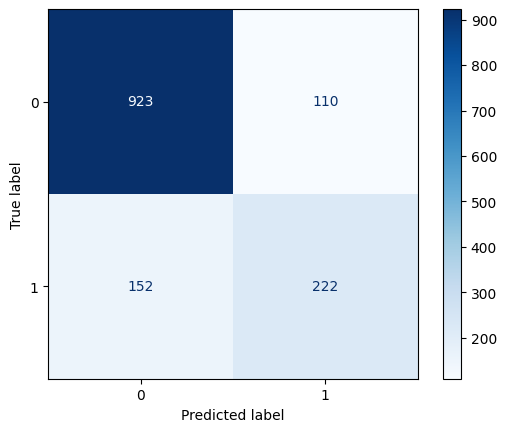

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_adaboost,cmap='Blues')

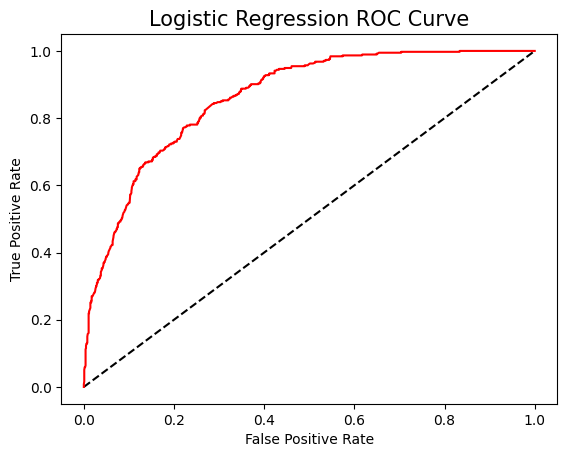

In [ ]:
y_predict_prob_adaboost=adaboost_clf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,y_predict_prob_adaboost)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=15)
plt.show()

In [ ]:
gradient_boost_classifier=GradientBoostingClassifier()
gradient_boost_classifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_predict_gradient_boost=gradient_boost_classifier.predict(x_test)
np.concatenate((y_test.reshape(-1,1),y_predict_gradient_boost.reshape(-1,1)),1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0]])

In [ ]:
print(classification_report(y_test,y_predict_gradient_boost))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.53      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



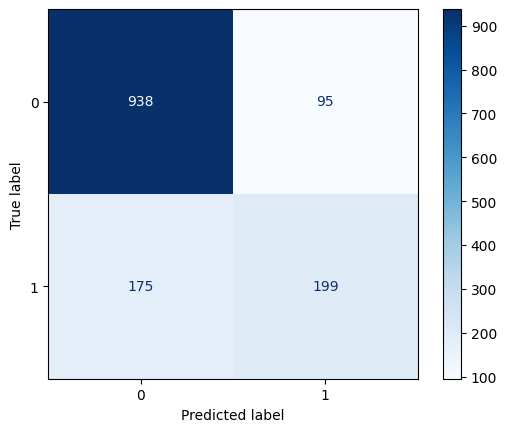

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_gradient_boost,cmap='Blues')

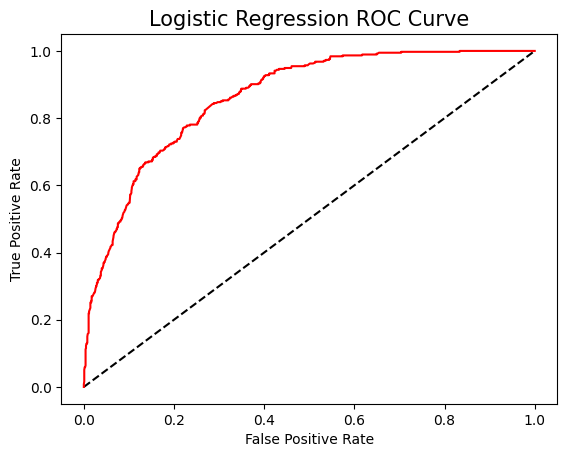

In [ ]:
y_predict_prob_gradien_boost=gradient_boost_classifier.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,y_predict_prob_adaboost)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=15)
plt.show()

In [ ]:
xgboost_clf=XGBClassifier()
xgboost_clf.fit(x_train,y_train)
print(f'Accuracy for training set : {xgboost_clf.score(x_train,y_train)}')
print(f'Accuracy for testing set : {xgboost_clf.score(x_test,y_test)}')


Accuracy for training set : 0.9344
Accuracy for testing set : 0.7768301350390903


In [ ]:
from sklearn.model_selection import GridSearchCV

# تعريف المعلمات التي تريد اختبارها
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9]
}

# تطبيق GridSearchCV
grid_search_xgboost = GridSearchCV(estimator=XGBClassifier(n_estimators=100),
                           param_grid=param_grid,
                           scoring='accuracy', cv=5)

grid_search_xgboost.fit(x_train, y_train)

# أفضل المعلمات
print(f"Best Parameters: {grid_search_xgboost.best_params_}")


Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}


In [ ]:
best_xgboost=grid_search_xgboost.best_estimator_

In [ ]:
best_xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
best_xgboost.score(x_train,y_train)

0.8293333333333334

In [ ]:
best_xgboost.score(x_test,y_test)

0.8081023454157783

In [ ]:
y_predict_xgboost=best_xgboost.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict_xgboost))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
precision_score(y_test,y_predict_xgboost,average=None)

array([0.85291397, 0.6595092 ])

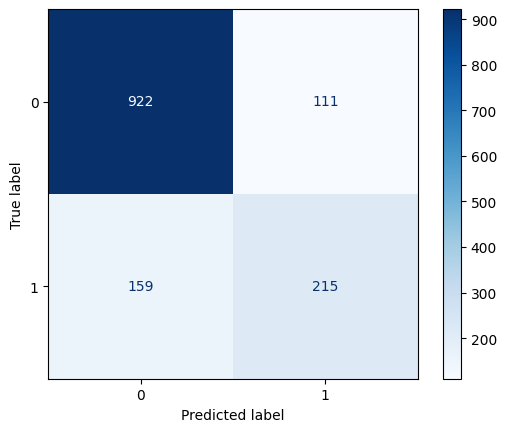

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_xgboost,cmap='Blues')

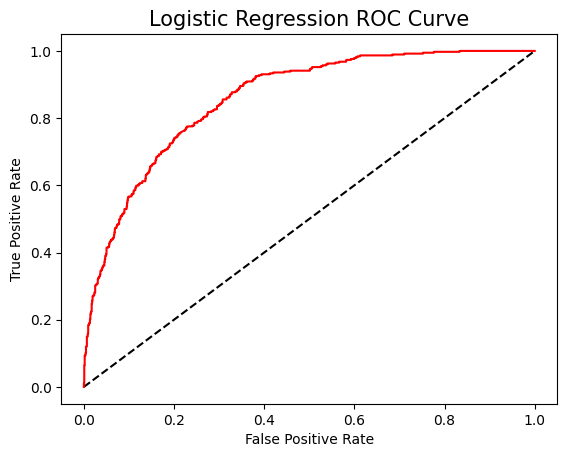

In [ ]:
y_predict_prob_xgboost=best_xgboost.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,y_predict_prob_xgboost)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=15)
plt.show()

In [ ]:
voting_clf=VotingClassifier([
    ('Logistic_Regression',logistic_regression),
    ('Decision_Tree',best_decision_tree_clf),
    ('Ranom_Forest',best_random_forest),
    ('KNN',best_knn),
    ('SVM',svm_clf),
    ('Adaboost',adaboost_clf),
    ('Gradiant_Boosting',gradient_boost_classifier),
    ('XGrediant_Booosting',best_xgboost)
    ])

In [ ]:
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree',
                              DecisionTreeClassifier(ccp_alpha=np.float64(0.000677177613740261),
                                                     random_state=73)),
                             ('Ranom_Forest',
                              RandomForestClassifier(max_leaf_nodes=50,
                                                     min_samples_split=50,
                                                     n_estimators=500,
                                                     oob_score=True,
                                                     random_state=73)),
                             ('KNN',
                              KNeighborsClassifier(metric='manhattan',...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=5,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))])

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name,'=',clf.score(x_test,y_test))

Logistic_Regression = 0.8052594171997157
Decision_Tree = 0.8045486851457001
Ranom_Forest = 0.8081023454157783
KNN = 0.7818052594171997
SVM = 0.7341862117981521
Adaboost = 0.8137882018479033
Gradiant_Boosting = 0.8088130774697939
XGrediant_Booosting = 0.8081023454157783


In [ ]:
[clf.predict(x_test[:1])   for clf in voting_clf.estimators_]

[array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1])]

In [ ]:
y_test[:1]

array([0])

In [ ]:
print(f'Accuarcy for voting classifier in testing data is = {voting_clf.score(x_test,y_test)}')

Accuarcy for voting score is = 0.851457000710732


In [ ]:
print(f'Accuarcy for voting classifier in training data is = {voting_clf.score(x_train,y_train)}')

Accuarcy for voting classifier in training data is = 0.7959111111111111


In [ ]:
y_predict_voting_score=voting_clf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict_voting_score))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1033
           1       0.80      0.59      0.68       374

    accuracy                           0.85      1407
   macro avg       0.83      0.77      0.79      1407
weighted avg       0.85      0.85      0.84      1407



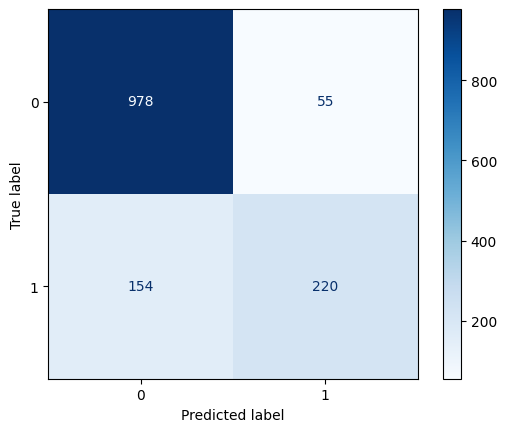

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_voting_score,cmap='Blues')

In [ ]:
naive_bayes_clf=GaussianNB()

In [ ]:
naive_bayes_clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
naive_bayes_clf.score(x_test,y_test)

0.7683013503909026

In [ ]:
extra_trees_clf=ExtraTreesClassifier(max_depth=10,
                                     min_samples_split=5,ccp_alpha=0.001,random_state=73)

In [ ]:
extra_trees_clf.fit(x_train,y_train)

ExtraTreesClassifier(ccp_alpha=0.001, max_depth=10, min_samples_split=5,
                     random_state=73)

In [ ]:
extra_trees_clf.score(x_test,y_test)

0.8002842928216063

In [ ]:
extra_trees_clf.score(x_train,y_train)

0.7957333333333333

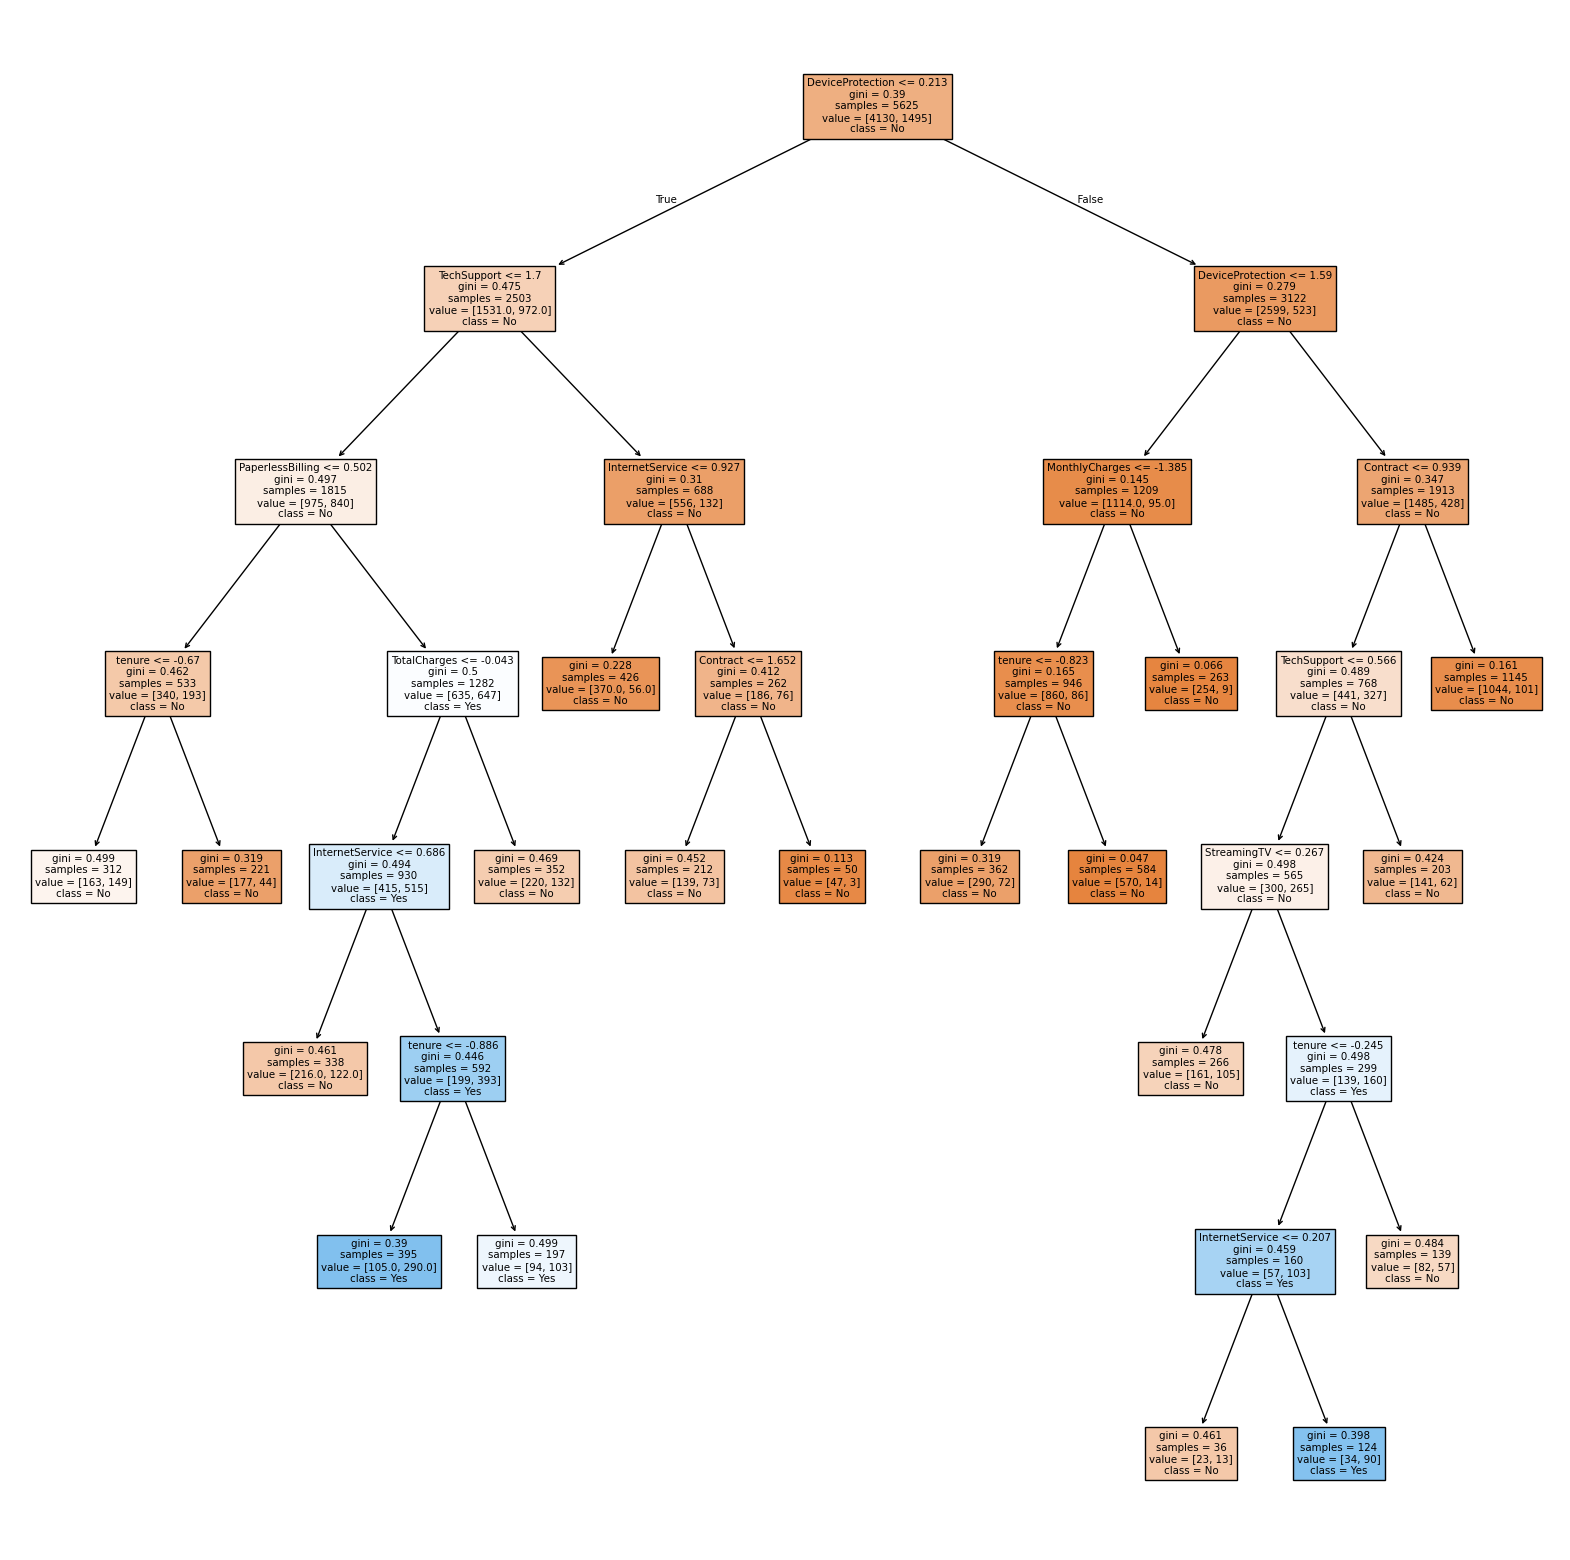

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(extra_trees_clf.estimators_[0],feature_names=x_test.columns,class_names=['No','Yes'],filled=True)
plt.show()

In [ ]:
tf.random.set_seed(73)
np.random.seed(73)
random.seed(73)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax',name='output_layer')
])
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
                optimizer=tf.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy']
                )
model_1.fit(x_train,y_train,
            epochs=5,
            validation_data=(x_test,y_test))

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7143 - loss: 0.5204 - val_accuracy: 0.7839 - val_loss: 0.4208
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7929 - loss: 0.4310 - val_accuracy: 0.7932 - val_loss: 0.4162
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7990 - loss: 0.4229 - val_accuracy: 0.7989 - val_loss: 0.4138
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8056 - loss: 0.4167 - val_accuracy: 0.7967 - val_loss: 0.4130
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8093 - loss: 0.4116 - val_accuracy: 0.7925 - val_loss: 0.4150


In [ ]:
model_1.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.5024846 , 0.49751535],
       [0.98711413, 0.01288595],
       [0.564284  , 0.43571582],
       [0.6559728 , 0.3440272 ],
       [0.98200804, 0.017992  ],
       [0.96704984, 0.03295011],
       [0.99269414, 0.00730574],
       [0.3616967 , 0.6383033 ],
       [0.9711544 , 0.02884564],
       [0.98573786, 0.0142622 ],
       [0.9401975 , 0.05980246],
       [0.5646092 , 0.43539074],
       [0.3368134 , 0.66318655],
       [0.9902497 , 0.00975022],
       [0.5083456 , 0.4916544 ],
       [0.96285164, 0.03714833],
       [0.19383225, 0.80616784],
       [0.77707475, 0.22292516],
       [0.977598  , 0.02240205],
       [0.19139534, 0.80860466],
       [0.9609336 , 0.03906629],
       [0.7321006 , 0.26789942],
       [0.9399559 , 0.06004408],
       [0.7712877 , 0.22871235],
       [0.97865677, 0.0213433 ],
       [0.9549036 , 0.04509648],
       [0.8066745 , 0.19332553],
       [0.8383727 , 0.16162723],
       [0.07721619, 0.92278385],
       [0.74905807, 0.2509419 ],
       [0.